# Home Credit Score Card Model
Author : Irvan Febyanto (febyantoirvan@gmail.com) - Agustus, 2022.

#### **Business problem statement**:
1. Bagaimana caranya kita mengidentifikasi karakteristik klien yang berpotensi kesulitan dalam pembayaran pinjaman dan tidak kesulitan dalam pembayaran pinjaman?
2. Bagaimana caranya kita memprediksi kemampuan pembayaran klien sehingga dapat meminimalkan risiko kegagalan pembayaran pinjaman?

#### **Objectives**:
1. Mengetahui karakteristik klien yang berpotensi kesulitan dalam pembayaran peminjaman dan tidak kesulitan dalam pembayaran pinjaman.
2. Membuat model untuk memprediksi kemampuan pembayaran klien sehingga dapat menentukan apakah pengajuan pinjamannya ditolak atau diterima.

#### **Data source**:
Dataset yang digunakan berupa **Home Credit Default Risk**. Dataset diambil dari https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip.

## Import Libraries

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic Test
from scipy.stats import shapiro

# Modeling Utilities
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

# Import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Dataset and Brief Explanation of Dataset

Main Dataset : data application (train)

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Rakamin/Home_Credit/application_train.csv')

# Menampilkan 5 baris pertama dari dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Memberikan informasi setiap kolom dan tipe data dari dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
# Menunjukkan jumlah baris dan kolom dari dataset
print("Jumlah baris: {}\nJumlah kolom: {}".format(df.shape[0], df.shape[1]))

Jumlah baris: 307511
Jumlah kolom: 122


Data yang akan digunakan untuk analisis dan pemodelan adalah **application_train.csv**. Data tersebut berisi data statis untuk semua permohonan pinjaman. Setiap baris merepresentasikan satu pinjaman. Data tersebut memiliki 307511 baris dan 122 kolom.

## Exploratory Data Analysis

### Univariate Analysis

#### The Number of Customers Based on Their Repayment Abilities

In [ ]:
df_app = df.copy()

# Menghitung jumlah klien yang tidak kesulitan dan klien yang kesulitan dalam pembayaran pinjaman
df_client = pd.DataFrame({
            'Target' : [0, 1],
            'Description' : ['No Payment Difficulties', 'Payment Difficulties'],
            'Count' : [(df_app['TARGET'].value_counts()[0]), (df_app['TARGET'].value_counts()[1])],
            'Percentage': [((df_app['TARGET'].value_counts()[0])/len(df_app['TARGET'])*100), ((df_app['TARGET'].value_counts()[1])/len(df_app['TARGET'])*100)]
})

df_client

,Target,Description,Count,Percentage
0,0,No Payment Difficulties,282686,91.927118
1,1,Payment Difficulties,24825,8.072882


- `TARGET = 0` : Klien yang tidak kesulitan dalam pembayaran pinjaman
- `TARGET = 1` : Klien yang kesulitan dalam pembayaran pinjaman

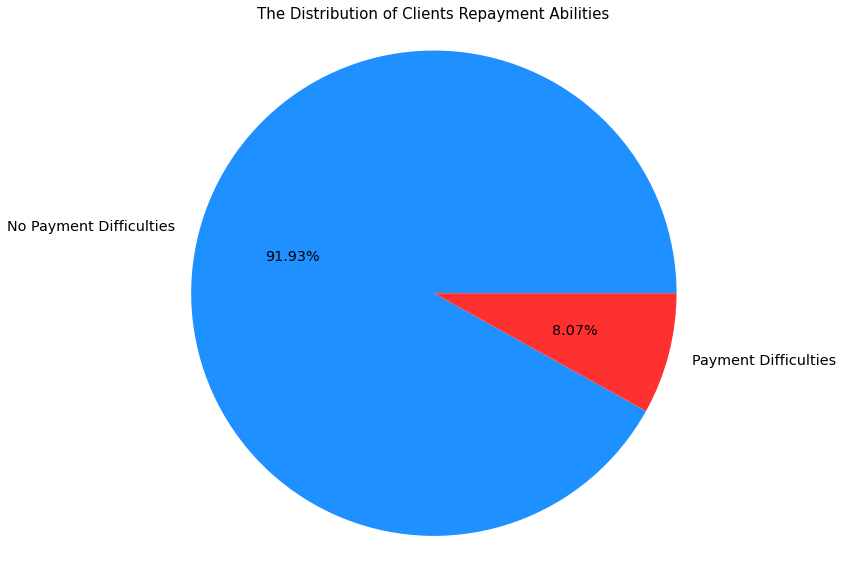

In [ ]:
# Pie chart perbandingan jumlah klien yang tidak kesulitan dan kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(10,8))
labels = ['No Payment Difficulties','Payment Difficulties']
colors = ['#1E90FF', '#FF3030']
plt.pie(df_client['Count'],
        labels = labels,
        autopct='%.2f%%',
        colors=colors,
        textprops={'size': 'x-large'})
plt.title('The Distribution of Clients Repayment Abilities', size=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

Ada 282686 klien (91.93% dari keseluruhan) merupakan klien yang tidak kesulitan dalam pembayaran pinjaman. Sementara itu, ada 24825 klien (8.07% dari keseluruhan) merupakan klien yang mengalami kesulitan dalam pembayaran pinjaman. 

**Catatan**: Berdasarkan hal di atas, dapat dikatakan dataset ini tidak seimbang atau *imbalanced* sehingga membutuhkan perlakuan khusus seperti *resampling* untuk pemodelan nanti.

### Bivariate Analysis : Numerical Features vs Target

In [ ]:
# Mengubah nilai dalam kolom 'TARGET' menjadi keterangan 'No Payment Difficulties' dan 'Payment Difficulties'
client_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return client_map[int(label)]

df_app['TARGET'] = df_app['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Payment Difficulties,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,No Payment Difficulties,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,No Payment Difficulties,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Age vs Target

In [ ]:
# Membuat variabel yang menampung data umur klien yang tidak kesulitan dan yang kesulitan dalam pembayaran pinjaman
age_no = abs(df_app[df_app['TARGET']=='No Payment Difficulties']['DAYS_BIRTH'].values / 365)
age_yes = abs(df_app[df_app['TARGET']=='Payment Difficulties']['DAYS_BIRTH'].values / 365)

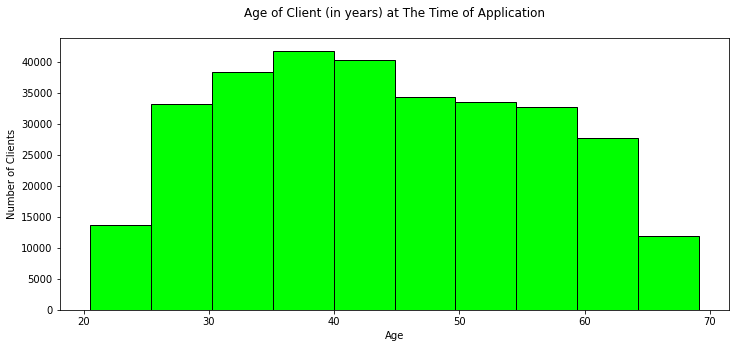

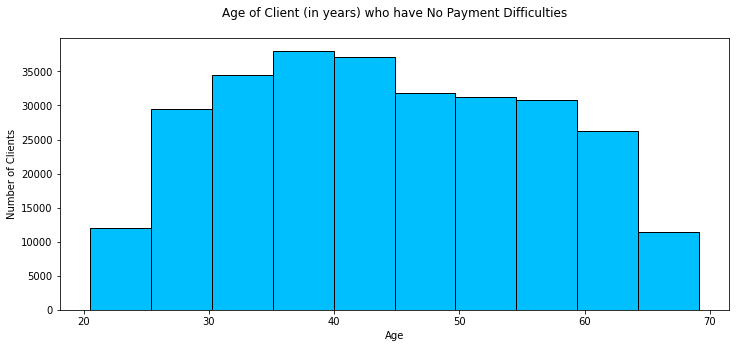

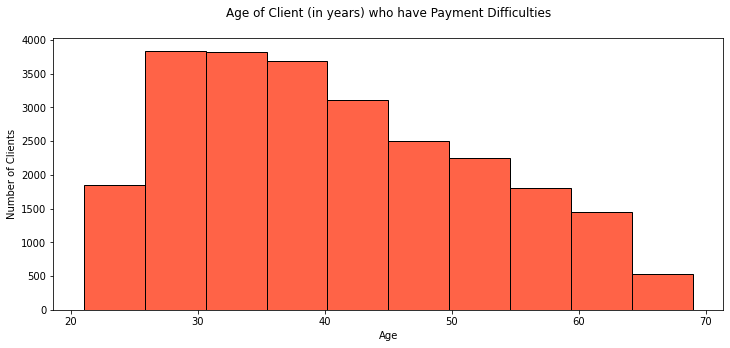

In [ ]:
# Membuat histogram umur dari semua klien
plt.figure(figsize=(12,5))
plt.hist(abs(df_app['DAYS_BIRTH'].values/365), bins=10, edgecolor='black', color='lime')
plt.title('Age of Client (in years) at The Time of Application\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Membuat histogram umur dari klien yang tidak kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(12,5))
plt.hist(age_no, bins=10, edgecolor='black', color='deepskyblue')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Membuat histogram umur dari klien yang tidak kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(12,5))
plt.hist(age_yes, bins=10, edgecolor='black', color='tomato')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Klien terbanyak yang mengajukan pinjaman berada pada rentang usia 35-40 tahun, diikuti klien dengan rentang usia 45-50 tahun di tempat kedua terbanyak. Selain itu, klien dengan umur di bawah 25 tahun dan di atas 65 tahun memiliki jumlah terkecil.

Klien yang tidak kesulitan dalam pembayaran pinjaman paling banyak berada pada rentang usia 35-45 tahun. Sementara, klien yang kesulitan dalam pembayaran pinjaman paling banyak berada pada rentang usia 25-35 tahun.

#### Days Employed vs Target

In [ ]:
df_app_employed = df_app[df_app['DAYS_EMPLOYED'] != 365243]
# Membuat variabel yang menampung data lama bekerja klien yang tidak kesulitan dan yang kesulitan dalam pembayaran pinjaman
days_employed_no = abs(df_app_employed[df_app_employed['TARGET']=='No Payment Difficulties']['DAYS_EMPLOYED'].values / 365)
days_employed_yes = abs(df_app_employed[df_app_employed['TARGET']=='Payment Difficulties']['DAYS_EMPLOYED'].values / 365)

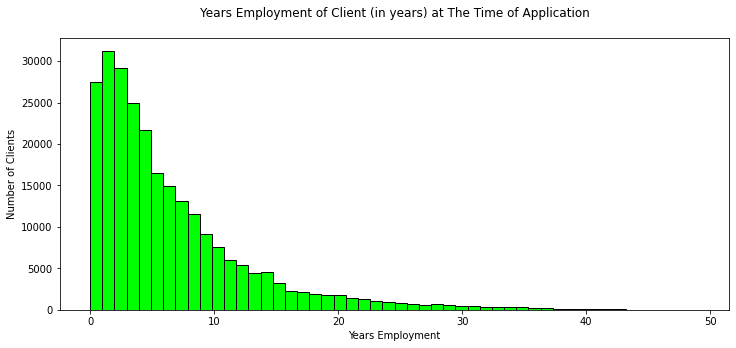

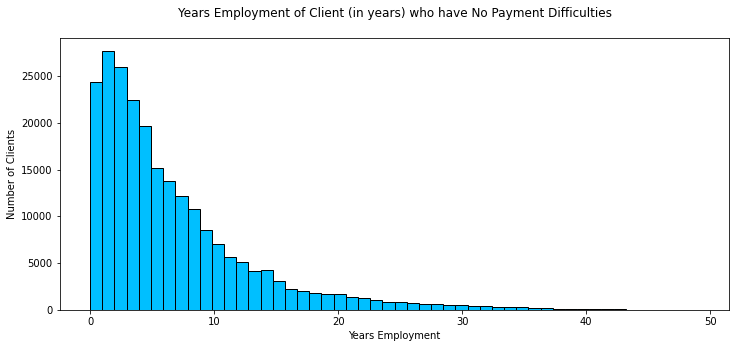

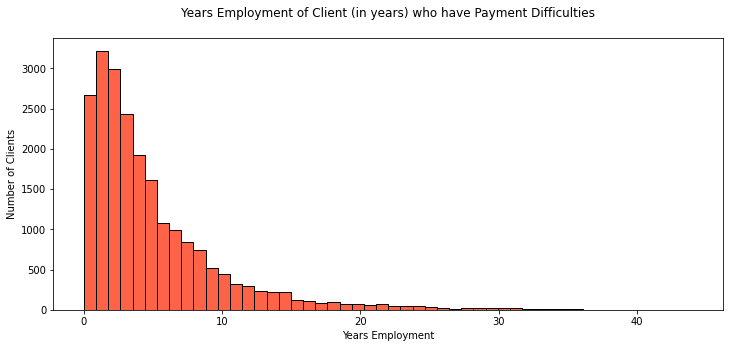

In [ ]:
# Membuat histogram masa kerja dari semua klien
plt.figure(figsize=(12,5))
plt.hist(abs(df_app_employed['DAYS_EMPLOYED'].values/365), bins=50, edgecolor='black', color='lime')
plt.title('Years Employment of Client (in years) at The Time of Application\n')
plt.xlabel('Years Employment')
plt.ylabel('Number of Clients')
plt.show()

# Membuat histogram masa kerja dari klien yang tidak kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(12,5))
plt.hist(days_employed_no, bins=50, edgecolor='black', color='deepskyblue')
plt.title('Years Employment of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Years Employment')
plt.ylabel('Number of Clients')
plt.show()

# Membuat histogram masa kerja dari klien yang tidak kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(12,5))
plt.hist(days_employed_yes, bins=50, edgecolor='black', color='tomato')
plt.title('Years Employment of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Years Employment')
plt.ylabel('Number of Clients')
plt.show()

Klien yang kesulitan dalam membayar pinjaman kebanyakan memiliki masa kerja kurang dari 2 tahun.

#### Income vs Target

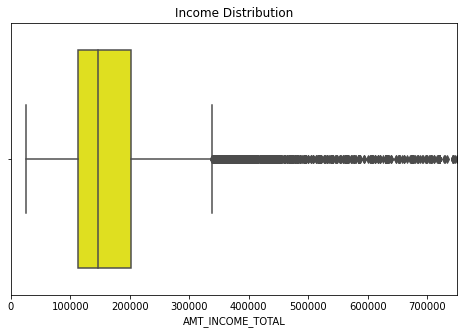

In [ ]:
# Boxplot distribusi pendapatan
plt.figure(figsize=(8,5))
sns.boxplot(data=df_app, x='AMT_INCOME_TOTAL', color='yellow')
plt.xlim(0, 750000)
plt.title('Income Distribution')
plt.show()

Berdasarkan box plot di atas, sekitar 75% pendapatan klien berpenghasilan kurang dari 200000.

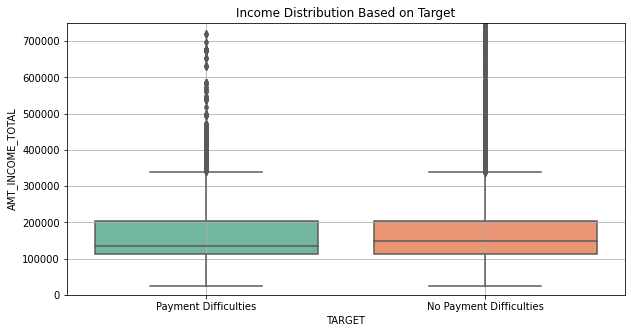

In [ ]:
# Boxplot distribusi pendapatan berdasarkan kemampuan pembayaran pinjaman klien
plt.figure(figsize=(10,5))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_app, palette = 'Set2')
plt.ylim(0, 750000)
plt.title('Income Distribution Based on Target')
plt.grid()
plt.show()

Terlihat bahwa baik klien yang mengalami kesulitan pembayaran maupun klien yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai pendapatan yang sama.

#### Credit of Loan vs Target

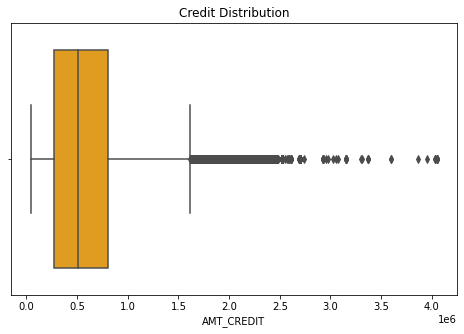

In [ ]:
# Boxplot distribusi pendapatan
plt.figure(figsize=(8,5))
sns.boxplot(data = df_app, x = 'AMT_CREDIT', color = 'orange')
plt.title('Credit Distribution')
plt.show()

Berdasarkan boxplot di atas, sekitar 75% peminjam memiliki nilai kredit kurang dari 1000000.

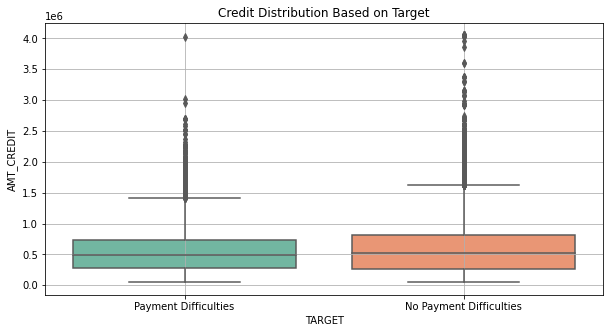

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_app, palette = 'Set2')
plt.title('Credit Distribution Based on Target')
plt.grid()
plt.show()

Terlihat bahwa nilai median jumlah kredit klien yang tidak mengalami kesulitan pembayaran sedikit lebih besar dari nilai median klien yang mengalami kesulitan pembayaran. Artinya, klien dengan jumlah kredit yang lebih tinggi memiliki peluang yang sedikit lebih tinggi untuk mampu membayar pinjaman daripada klien dengan jumlah kredit yang lebih rendah.

#### The Number of Children vs Target

In [ ]:
# Menghitung klien yang tidak kesulitan dalam pembayaran pinjaman berdasarkan jumlah anak yang dimiliki
children_no = df_app[df_app['TARGET']=='No Payment Difficulties']['CNT_CHILDREN'].value_counts()
df_children_no = pd.DataFrame({
                'The Number of Children' : children_no.index,
                'Count' : children_no.values,
                'Percentage': (children_no.values/df_app['TARGET'].value_counts()[0])*100
})

df_children_no

,The Number of Children,Count,Percentage
0,0,198762,70.311936
1,1,55665,19.691460
2,2,24416,8.637145
3,3,3359,1.188244
4,4,374,0.132302
5,5,77,0.027239
6,6,15,0.005306
7,7,7,0.002476
8,14,3,0.001061
9,8,2,0.000707


In [ ]:
# Menghitung klien yang kesulitan dalam pembayaran pinjaman berdasarkan jumlah anak yang dimiliki
children_yes = df_app[df_app['TARGET']=='Payment Difficulties']['CNT_CHILDREN'].value_counts()
df_children_yes = pd.DataFrame({
                'The Number of Children' : children_yes.index,
                'Count' : children_yes.values,
                'Percentage': (children_yes.values/df_app['TARGET'].value_counts()[1])*100
})

df_children_yes

,The Number of Children,Count,Percentage
0,0,16609,66.904330
1,1,5454,21.969789
2,2,2333,9.397784
3,3,358,1.442095
4,4,55,0.221551
5,5,7,0.028197
6,6,6,0.024169
7,9,2,0.008056
8,11,1,0.004028


Berdasarkan hasil analisis di atas, sebanyak 66.9% dari klien yang kesulitan membayar pinjaman merupakan klien yang tidak memiliki anak.

### Bivariate Analysis : Categorical Features vs Target

#### Contract Type vs Target

In [ ]:
# Pinjaman berdasarkan jenisnya dan kemampuan pembayaran klien
contract_target = df_app.groupby(by=['NAME_CONTRACT_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
contract_target

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
1,Cash loans,Payment Difficulties,23221
2,Revolving loans,No Payment Difficulties,27675
3,Revolving loans,Payment Difficulties,1604


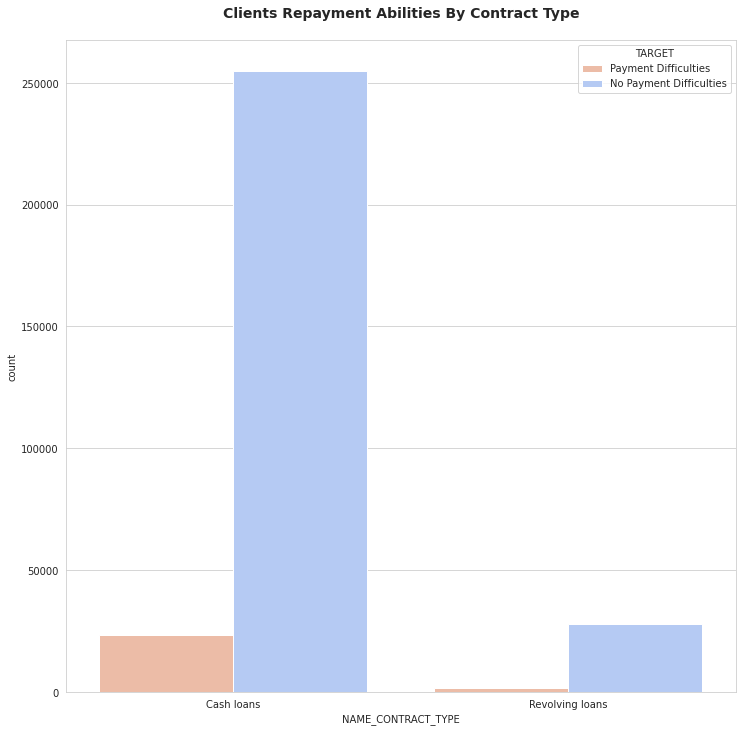

In [ ]:
# Grafik kemampuan pembayaran klien berdasarkan jenis pinjaman
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='NAME_CONTRACT_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', size = 14)
plt.show()

Pinjaman tunai (*cash loans*) merupakan mayoritas jenis pinjaman dari dataset ini yaitu sebanyak 278232 pinjaman. Sementara pinjaman bergulir (*revolving loans*) jumlahnya jauh lebih rendah yaitu 29279 pinjaman. 

Dari semua klien yang kesulitan membayar pinjaman, 93.53% berasal dari klien yang mengambil jenis pinjaman tunai (*cash loans*).

In [ ]:
df[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


Berdasarkan tabel di atas, klien yang mengambil jenis pinjaman *Cash loans* lebih berpeluang mengalami kesulitan pembayaran pinjaman dibandingkan klien yang mengambil jenis pinjaman *revolving loans*. Hal ini dikarenakan sebanyak 8.34% klien yang mengambil pinjaman *cash loans* mengalami kesulitan pembayaran pinjaman sementara sekitar 5.47% yang mengambil pinjaman *revolving loans* mengalami kesulitan pembayaran pinjaman.

#### Gender vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis kelamin
df_app['CODE_GENDER'] = df_app['CODE_GENDER'].replace(['F','M'],['Female','Male'])

gender_target = df_app.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
gender_target

,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,188278
1,Female,Payment Difficulties,14170
2,Male,No Payment Difficulties,94404
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [ ]:
df[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


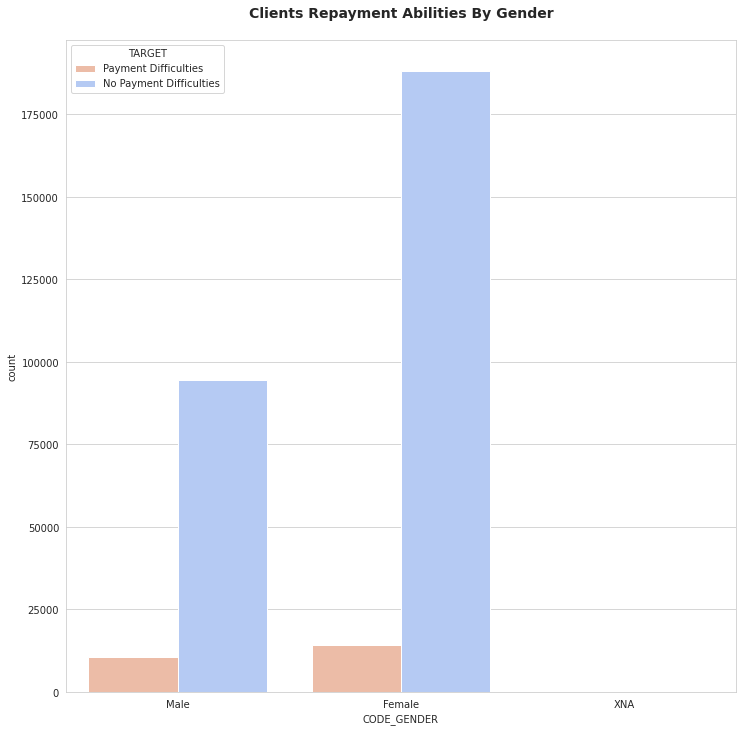

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis kelamin
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='CODE_GENDER', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Gender\n', fontweight='bold', size = 14)
plt.show()

Dapat dilihat bahwa sebagian besar pinjaman diajukan oleh wanita. Secara total ada 202448 pinjaman yang diajukan oleh wanita dan 105059 diajukan oleh pria. 

Dari 202448 pinjaman yang diajukan oleh wanita, sekitar 7% merupakan klien yang kesulitan melakukan pembayaran pinjaman. Sementara dari 105059 pinjaman yang diajukan pria, sekitar 10% merupakan klien yang kesulitan melakukan pembayaran pinjaman. Berdasarkan hal tersebut maka pria memiliki persentase kesulitan pembayaran pinjaman yang lebih besar dibandingkan wanita.

#### Family Status vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan status pernikahan
gender_target = df_app.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
gender_target

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,No Payment Difficulties,26814
1,Civil marriage,Payment Difficulties,2961
2,Married,No Payment Difficulties,181582
3,Married,Payment Difficulties,14850
4,Separated,No Payment Difficulties,18150
5,Separated,Payment Difficulties,1620
6,Single / not married,No Payment Difficulties,40987
7,Single / not married,Payment Difficulties,4457
8,Unknown,No Payment Difficulties,2
9,Widow,No Payment Difficulties,15151


In [ ]:
df[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


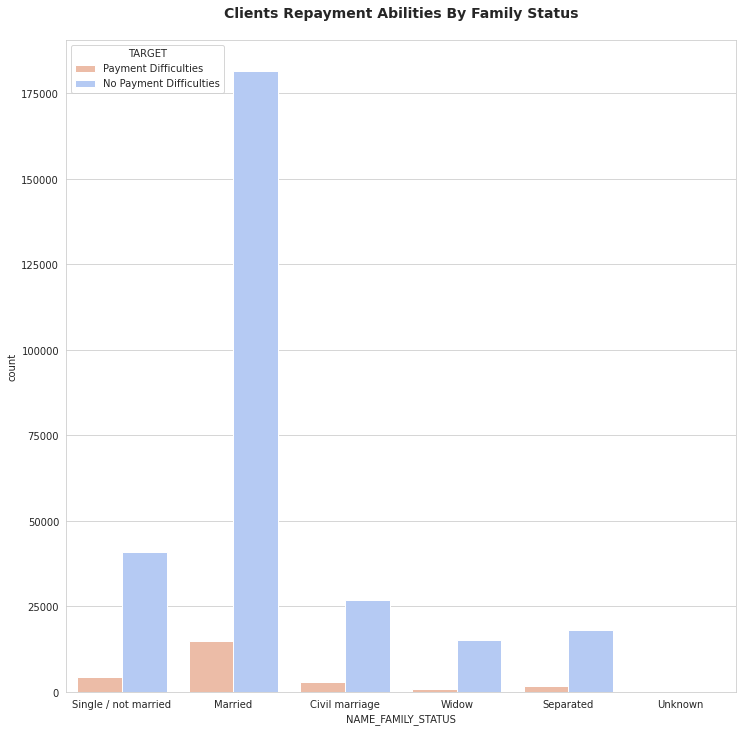

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan satus pernikahan
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='NAME_FAMILY_STATUS', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Family Status\n', fontweight='bold', size = 14)
plt.show()

Klien yang sudah menikah merupakan mayoritas yang mengajukan pinjaman yaitu 196432 permohonan pinjaman. Namun, sekitar 14850 klien yang sudah menikah merupakan klien yang kesulitan dalam melakukan pembayaran pinjaman dimana jumlah ini setara dengan 59.8% dari keseluruhan klien yang kesulitan membayar pinjaman.

#### Suite Type vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan tipe suite
suite_target = df_app.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
suite_target

,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,No Payment Difficulties,3026
1,Children,Payment Difficulties,241
2,Family,No Payment Difficulties,37140
3,Family,Payment Difficulties,3009
4,Group of people,No Payment Difficulties,248
5,Group of people,Payment Difficulties,23
6,Other_A,No Payment Difficulties,790
7,Other_A,Payment Difficulties,76
8,Other_B,No Payment Difficulties,1596
9,Other_B,Payment Difficulties,174


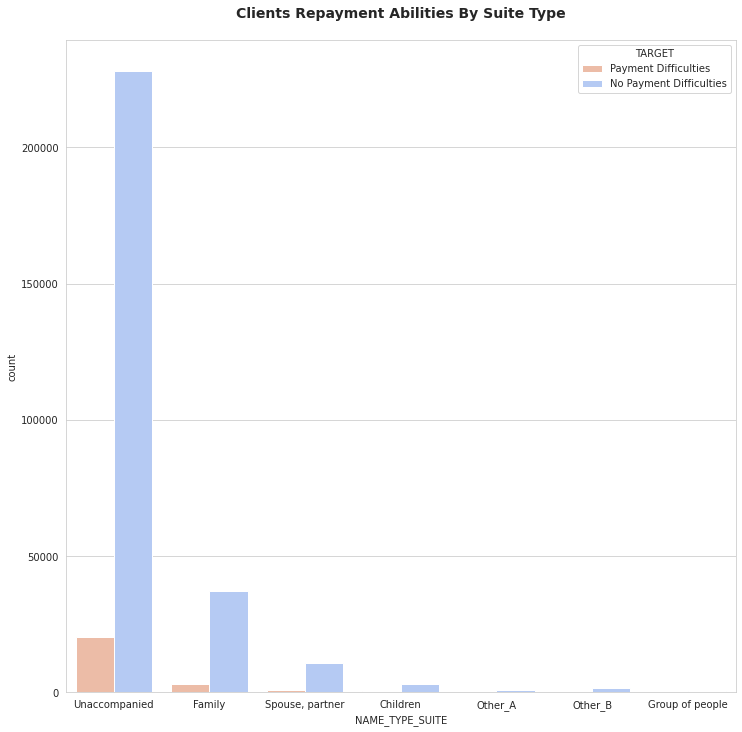

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan satus pernikahan
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='NAME_TYPE_SUITE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', size = 14)
plt.show()

Klien yang tidak didampingi saat mengajukan pinjaman merupakan klien mayoritas dengan jumlah 248526. Namun, 20337 orang dari klien tersebut mengalami kesulitan pembayaran pinjaman.

In [ ]:
df[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Klien yang didampingi oleh *other_b* saat mengajukan pinjaman memiliki peluang kesulitan yang lebih tinggi dalam mengembalikan pinjaman (sekitar 10%)

#### Income Type vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis pendapatan
income_target = df_app.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
income_target

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,No Payment Difficulties,10
1,Commercial associate,No Payment Difficulties,66257
2,Commercial associate,Payment Difficulties,5360
3,Maternity leave,No Payment Difficulties,3
4,Maternity leave,Payment Difficulties,2
5,Pensioner,No Payment Difficulties,52380
6,Pensioner,Payment Difficulties,2982
7,State servant,No Payment Difficulties,20454
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18


In [ ]:
df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


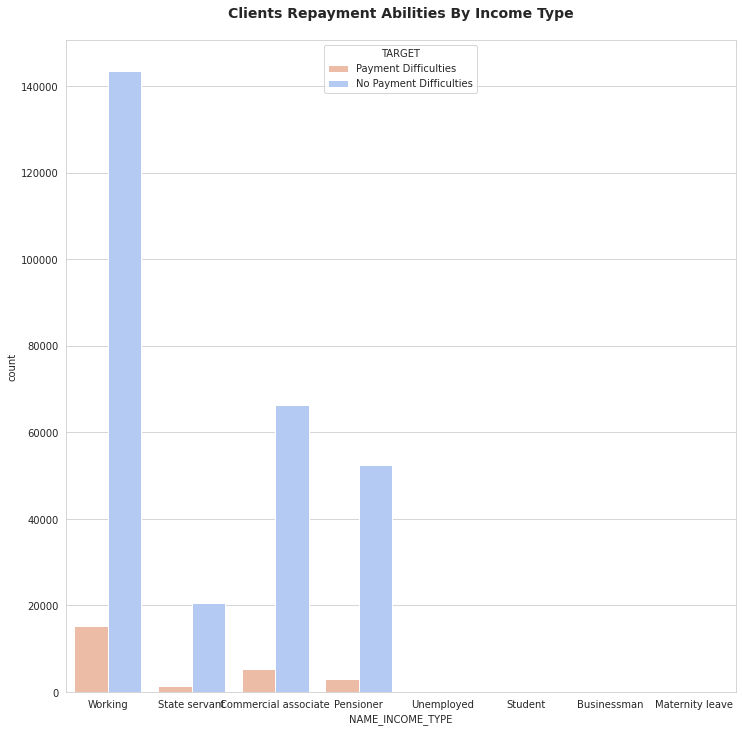

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pendapatan
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='NAME_INCOME_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Income Type\n', fontweight='bold', size = 14)
plt.show()

- Sebagian besar pemohon pinjaman memperoleh pendapatan dari bekerja (*working*), kemudian diikuti *commercial associate*, *pensioner* dan *state servant*.

- Klien yang memiliki jenis pendapatan *working* merupakan klien mayoritas yang mengajukan pinjaman yaitu sebesar 158774 orang. Namun dari jumlah tersebut sekitar 15224 klien merupakan klien yang mengalami kesulitan melakukan pembayaran pinjaman. Dimana jumlah tersebut merupakan 61.32% dari keseluruhan klien yang kesulitan melakukan pembayaran pinjaman.

- Klien dengan tipe pengusaha dan pelajar tidak mengalami kesulitan dalam melunasi pinjamanya.

- Klien dangan jenis pendapatan *maternity leave*, 40%-nya mengalami kesulitan dalam pembayaran pinjaman dan jenis pendapatan *unemployed*, sekitar 36%-nya juga mengalami kesulitan dalam pembayaran pinjaman. 

#### Education Type vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis pendidikan
education_target = df_app.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
education_target

,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3
2,Higher education,No Payment Difficulties,70854
3,Higher education,Payment Difficulties,4009
4,Incomplete higher,No Payment Difficulties,9405
5,Incomplete higher,Payment Difficulties,872
6,Lower secondary,No Payment Difficulties,3399
7,Lower secondary,Payment Difficulties,417
8,Secondary / secondary special,No Payment Difficulties,198867
9,Secondary / secondary special,Payment Difficulties,19524


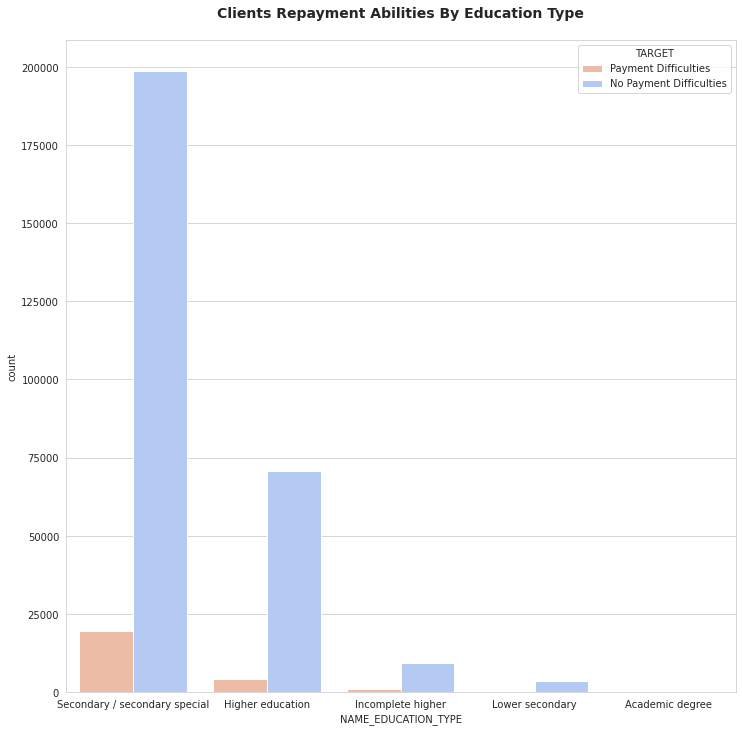

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pendidikan
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='NAME_EDUCATION_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Education Type\n', fontweight='bold', size = 14)
plt.show()

- Sebanyak 218391 permohonan pinjaman berasal dari klien dengan tingkat pendidikan menengah (*secondary/secondary special*). Namun 19524 dari jumlah tersebut mengalami kesulitan dalam pembayaran pinjaman. Jumlah ini setara dengan 78.65% dari keseluruhan klien yang mengalami kesulitan pembayaran pinjaman.

In [ ]:
df[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


- Klien dengan jenis pendidikan *academic degree* merupakan klien yang paling tidak kesulitan dalam melakukan pembayaran pinjaman. Sementara klien dengan jenis pendidikan *lower secondary* memiliki peluang tertinggi untuk mengalami kesulitan pembayaran pinjaman (sekitar 10%).

#### Housing Type vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis tempat tinggal
housing_target = df_app.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
housing_target

,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,No Payment Difficulties,1033
1,Co-op apartment,Payment Difficulties,89
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
4,Municipal apartment,No Payment Difficulties,10228
5,Municipal apartment,Payment Difficulties,955
6,Office apartment,No Payment Difficulties,2445
7,Office apartment,Payment Difficulties,172
8,Rented apartment,No Payment Difficulties,4280
9,Rented apartment,Payment Difficulties,601


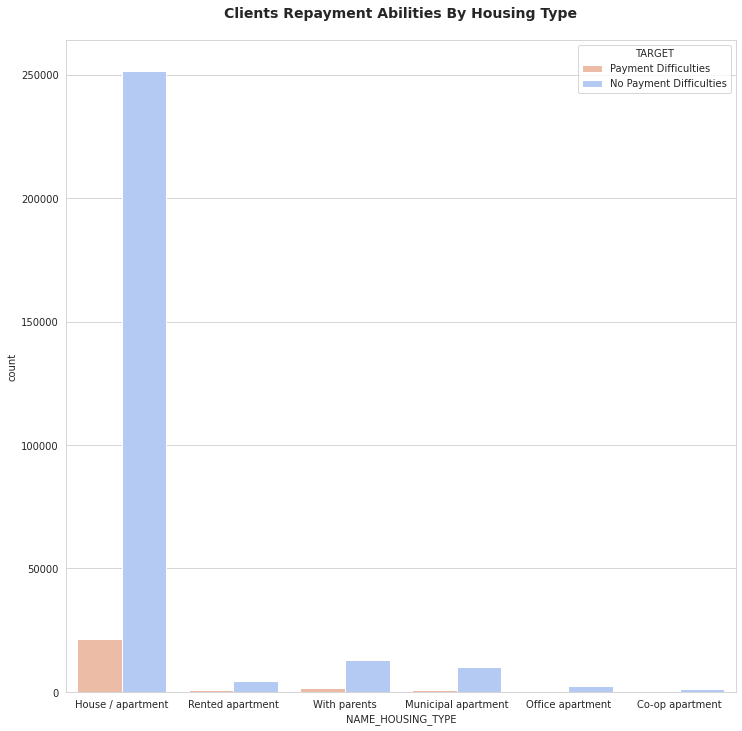

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis tempat tinggal
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='NAME_HOUSING_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', size = 14)
plt.show()

Klien mayoritas dalam melakukan pinjaman adalah klien yang memiliki tempat tinggal rumah/apartemen. Sebanyak 21272 klien yang memiliki tempat tinggal dengan jenis rumah atau apartmen merupakan klien terbesar yang mengalami kesulitan pembayaran pinjaman.

In [ ]:
df[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Klien dengan jenis tempat tinggal *rented apartment* dan *with parent* memiliki peluang terbesar dalam mengalami kesulitan pembayaran pinjaman.

#### Occupation Type vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
occupation_target = df_app.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
occupation_target

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,No Payment Difficulties,9339
1,Accountants,Payment Difficulties,474
2,Cleaning staff,No Payment Difficulties,4206
3,Cleaning staff,Payment Difficulties,447
4,Cooking staff,No Payment Difficulties,5325
5,Cooking staff,Payment Difficulties,621
6,Core staff,No Payment Difficulties,25832
7,Core staff,Payment Difficulties,1738
8,Drivers,No Payment Difficulties,16496
9,Drivers,Payment Difficulties,2107


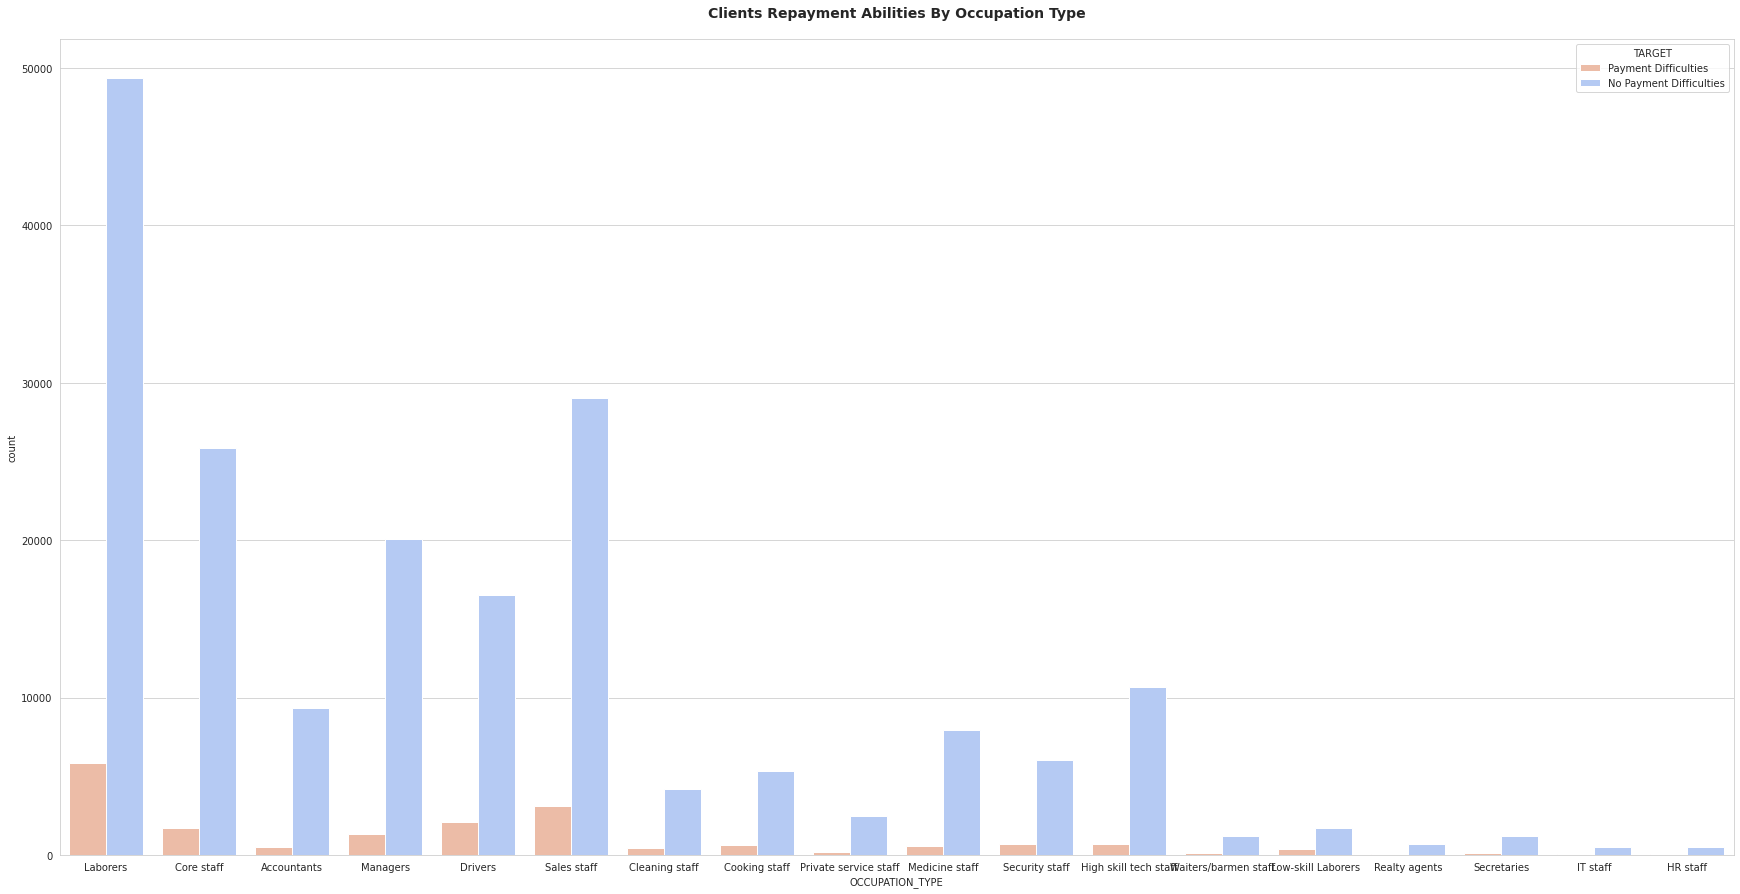

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
plt.figure(figsize=(30,15))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='OCCUPATION_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Occupation Type\n', fontweight='bold', size = 14)
plt.show()

Sejumlah besar pinjaman (55186 pinjaman) diajukan oleh klien yang bekerja sebagai buruh. Sebanyak 5838 dari jumlah tersebut merupakan pinjaman yang diajukan klien yang kesulitan melakukan pembayaran. Jumlah ini setara dengan 23.5% dari keseluruhan klien yang mengalami kesulitan pembayaran.

In [ ]:
occupation = df[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)
occupation

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


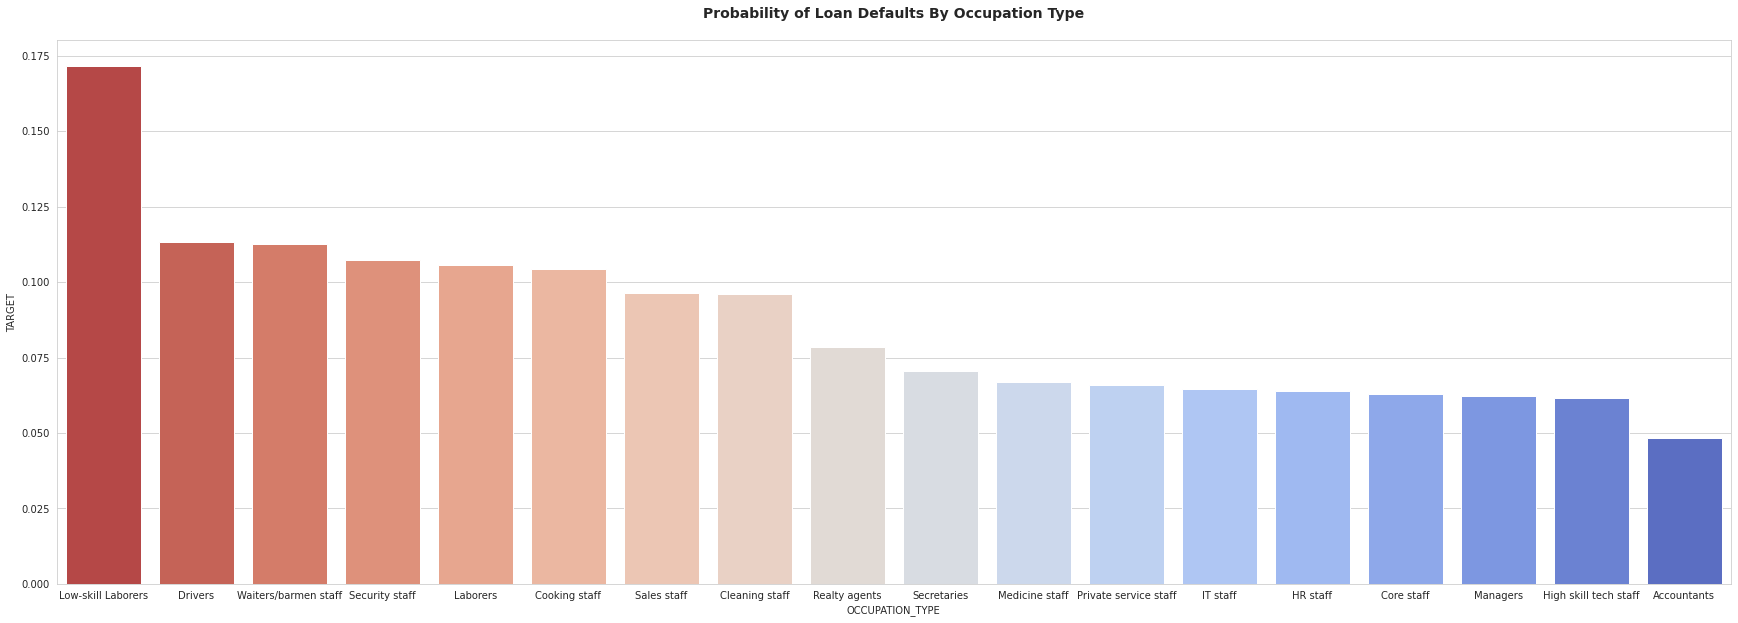

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
plt.figure(figsize=(30,10))
sns.set_style('whitegrid')
sns.barplot(data=occupation, x='OCCUPATION_TYPE', y='TARGET', palette='coolwarm_r')
plt.title('Probability of Loan Defaults By Occupation Type\n', fontweight='bold', size = 14)
plt.show()

- Klien dengan jenis pekerjaan *low-skill laborers* memiliki peluang tertinggi kesulitan pembayaran pinjaman.
- Klien dengan jenis pekerjaan *accountans*, *high skill tech staff* dan *managers* memiliki peluang terendah untuk kesulitan pembayaran pinjaman (lebih dari 93% dari masing-masing tipe klien tidak kesulitan membayar pinjaman). Namun jumlah masing-masing ketiga klien tersebut hanya sekitar kurang dari 10% dari keseluruhan klien. Oleh karena itu perlu dilakukan kegiatan promosi untuk menarik ketiga klien tersebut agar melakukan pinjaman.

#### Organization Type vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan bidang pekerjaan
organization_target = df_app.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
organization_target

,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,No Payment Difficulties,394
1,Advertising,Payment Difficulties,35
2,Agriculture,No Payment Difficulties,2197
3,Agriculture,Payment Difficulties,257
4,Bank,No Payment Difficulties,2377
5,Bank,Payment Difficulties,130
6,Business Entity Type 1,No Payment Difficulties,5497
7,Business Entity Type 1,Payment Difficulties,487
8,Business Entity Type 2,No Payment Difficulties,9653
9,Business Entity Type 2,Payment Difficulties,900


In [ ]:
df[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


- Klien dengan bidang pekerjaan *Business Entity:type 3*, *XNA* dan *self employed* merupakan klien mayoritas yang melakukan pinjaman. Sementara klien dengan bidang pekerjaan *Transport:type 3* merupakan klien yang berpeluang tinggi dalam kesulitan melakukan pembayaran pinjaman.



#### Car Ownership vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan kepemilikan mobil
df_app['FLAG_OWN_CAR'] = df_app['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])
car_target = df_app.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
car_target

,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,185675
1,No,Payment Difficulties,17249
2,Yes,No Payment Difficulties,97011
3,Yes,Payment Difficulties,7576


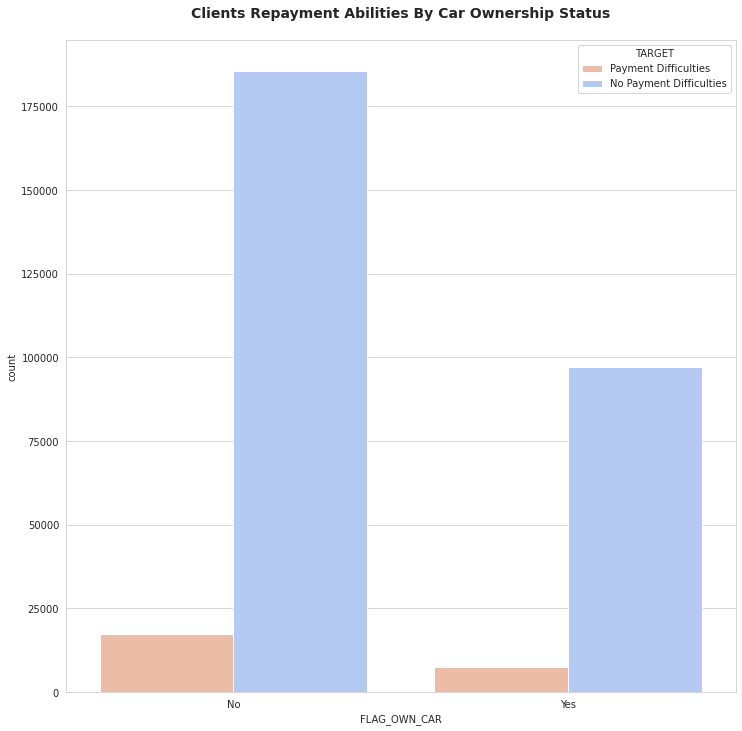

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan kepemilikan mobil
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='FLAG_OWN_CAR', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Car Ownership Status\n', fontweight='bold', size = 14)
plt.show()

Mayoritas klien merupakan klien yang tidak memiliki mobil, dimana jumlah klien yang tidak memiliki mobil jumlahnya dua kali lebih besar dibandingkan klien yang mempunyai mobil.


In [ ]:
df[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


Berdasarkan tabel di atas, klien yang tidak memiliki mobil (sekitar 8%) sedikit lebih berpeluang mengalami kesulitan pembayaran pinjaman dibandingkan klien yang memiliki mobil (sekitar 7%).

#### Realty Ownership vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan kepemilikan rumah/apartemen
df_app['FLAG_OWN_REALTY'] = df_app['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])
realty_target = df_app.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
realty_target

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,86357
1,No,Payment Difficulties,7842
2,Yes,No Payment Difficulties,196329
3,Yes,Payment Difficulties,16983


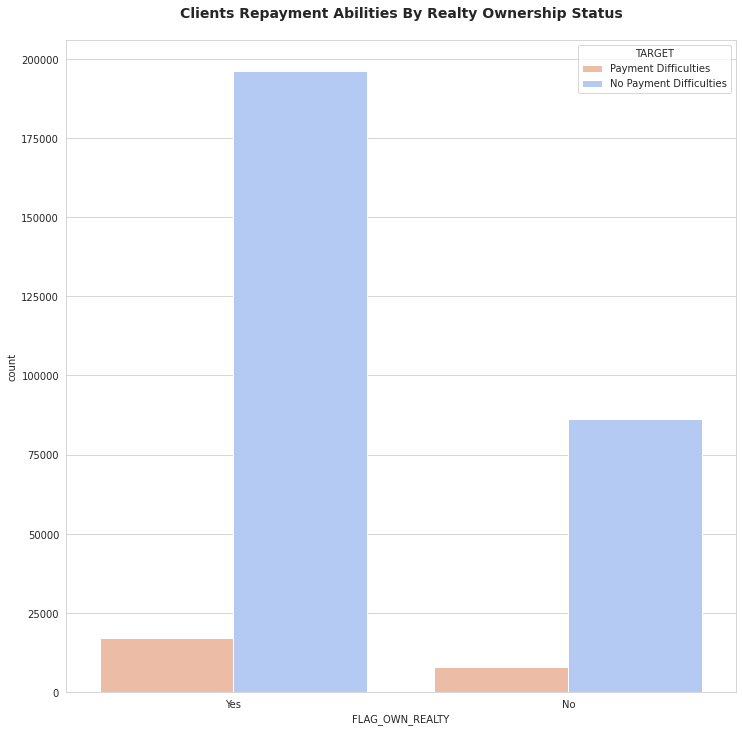

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan kepemilikan rumah/apartemen
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='FLAG_OWN_REALTY', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', size = 14)
plt.show()

Mayoritas klien merupakan klien yang memiliki rumah atau apartemen sendiri, dimana jumlahnya lebih dari dua kali lipat dibandingkan dengan klien yang tidak memiliki rumah atau apartemen sendiri.

In [ ]:
df[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


Berdasarkan tabel di atas, klien yang tidak memiliki rumah/apartemen sendiri (sekitar 8.3%) sedikit lebih berpeluang mengalami kesulitan pembayaran pinjaman dibandingkan klien yang memiliki rumah/apartemen sendiri (sekitar 7.9%).

#### Rating of Region where Client Lives vs Target

In [ ]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan peringkat wilayah berdasarkan tempat tinggal klien
region_target = df_app.groupby(by=['REGION_RATING_CLIENT_W_CITY','TARGET'], as_index=False)['SK_ID_CURR'].count()
region_target

,REGION_RATING_CLIENT_W_CITY,TARGET,SK_ID_CURR
0,1,No Payment Difficulties,32513
1,1,Payment Difficulties,1654
2,2,No Payment Difficulties,211314
3,2,Payment Difficulties,18170
4,3,No Payment Difficulties,38859
5,3,Payment Difficulties,5001


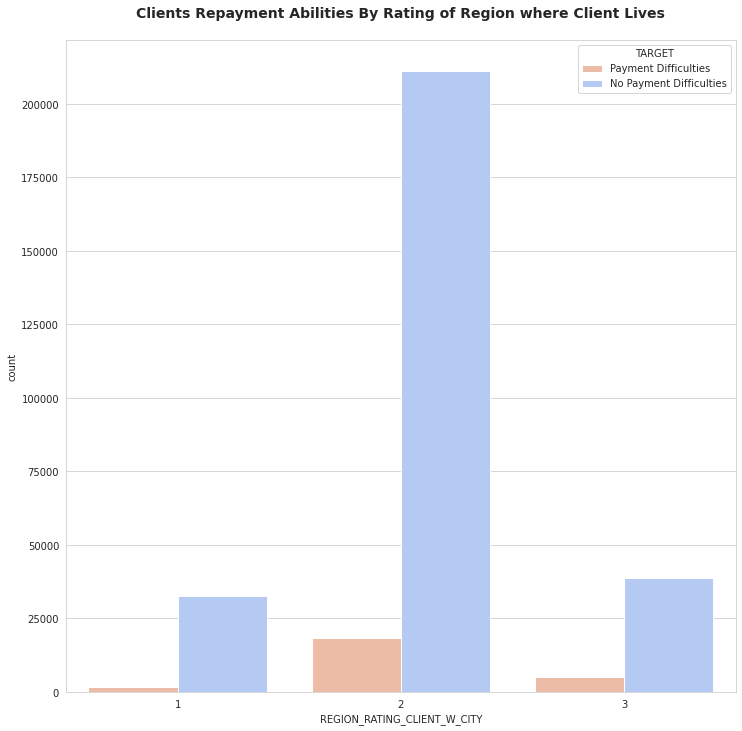

In [ ]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan kepemilikan rumah/apartemen
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_app, x='REGION_RATING_CLIENT_W_CITY', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Rating of Region where Client Lives\n', fontweight='bold', size = 14)
plt.show()

Klien yang bertempat tinggal di wilayah dengan *rating* 2 merupakan klien mayoritas yang melakukan pinjaman.

In [ ]:
df[['REGION_RATING_CLIENT_W_CITY','TARGET']].groupby(['REGION_RATING_CLIENT_W_CITY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,REGION_RATING_CLIENT_W_CITY,TARGET
2,3,0.114022
1,2,0.079178
0,1,0.048409


Klien yang bertempat tinggal di wilayah dengan *rating* 3 memiliki peluang tertinggi dalam mengalami kesulitan pembayaran pinjaman.

### Multivariate Analysis

#### Amount of Income, Amount of Credit, Target and Contract Type

In [ ]:
# Membuat variabel yang berisi data boolean yang menyatakan jumlah pendapatan lebih besar dari pada jumlah kredit
df_app['INCOME_GT_CREDIT_FLAG'] = df_app['AMT_INCOME_TOTAL'] > df_app['AMT_CREDIT']

- **False** : jika jumlah pendapatan total kurang dari jumlah kredit
- **True**  : jika jumlah pendapatan total lebih besar dari jumlah kredit

In [ ]:
income_credit = df_app.groupby(by=['INCOME_GT_CREDIT_FLAG', 'TARGET','NAME_CONTRACT_TYPE'], as_index=False)['SK_ID_CURR'].count()
income_credit

,INCOME_GT_CREDIT_FLAG,TARGET,NAME_CONTRACT_TYPE,SK_ID_CURR
0,False,No Payment Difficulties,Cash loans,243865
1,False,No Payment Difficulties,Revolving loans,25516
2,False,Payment Difficulties,Cash loans,22395
3,False,Payment Difficulties,Revolving loans,1497
4,True,No Payment Difficulties,Cash loans,11146
5,True,No Payment Difficulties,Revolving loans,2159
6,True,Payment Difficulties,Cash loans,826
7,True,Payment Difficulties,Revolving loans,107


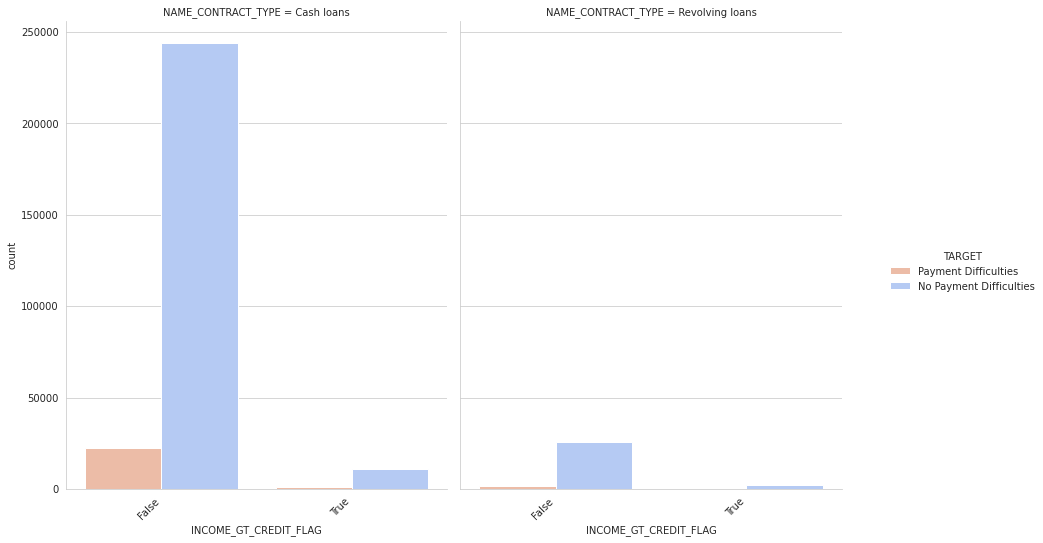

In [ ]:
# Plot variabel Gender, Amount of Credit, Target dan Contract Type
fig = sns.catplot(x = 'INCOME_GT_CREDIT_FLAG', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'count', palette = 'coolwarm_r',
            data = df_app)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Klien yang melakukan pinjaman didominasi oleh klien yang pendapatan totalnya lebih kecil dari jumlah kredit. Sebanyak 90.21% klien yang mengalami kesulitan pembayaran merupakan klien yang mengambil jenis pinjaman *cash loans* dan memiliki pendapatan total yang lebih kecil daripada jumlah kredit/pinjaman yang diambilmya.

#### Gender, Amount of Credit, Target and Contract Type


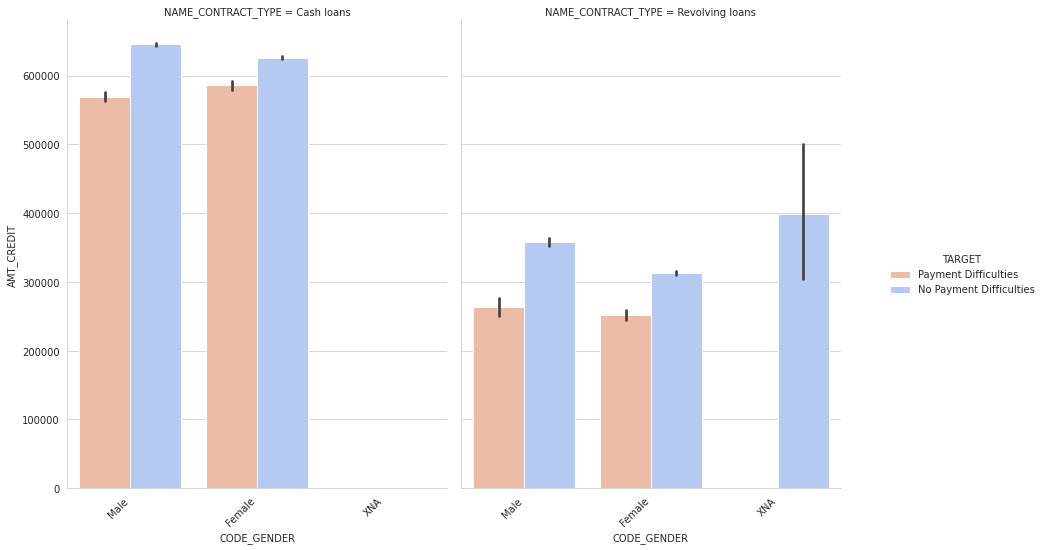

In [ ]:
# Plot variabel Gender, Amount of Credit, Target dan Contract Type
fig = sns.catplot(x = 'CODE_GENDER',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'coolwarm_r',
            data = df_app)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Klien wanita dan pria yang mengalami kesulitan pembayaran dan mengambil jenis pinjaman *cash loans* memiliki jumlah pinjaman yang lebih besar sekitar dua kali lipat pinjaman dari klien wanita dan pria yang mengalami kesulitan pembayaran dan mengambil jenis pinjaman *revolving loans*.

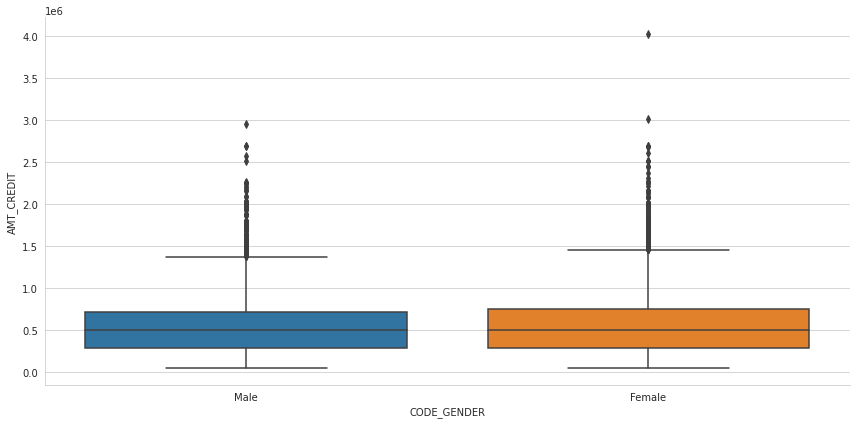

In [ ]:
sns.catplot(x="CODE_GENDER", y="AMT_CREDIT", kind="box", data=df_app[df_app['TARGET'] == 'Payment Difficulties'], height=6,aspect=2)

Kebanyakan klien wanita dan pria yang mengalami kesulitan pembayaran pinjaman memiliki jumlah kredit sekitar 500000 USD.

#### Income Type, Amount of Credit, Target and Contract Type

In [ ]:
# Membuat dataframe jumlah peminjam berdasarkan jenis pendapatan, jenis pinjaman dan kemampuan pembayaran pinjaman
df_app.groupby(by=['NAME_INCOME_TYPE', 'TARGET','NAME_CONTRACT_TYPE'], as_index=False)['SK_ID_CURR'].count()

,NAME_INCOME_TYPE,TARGET,NAME_CONTRACT_TYPE,SK_ID_CURR
0,Businessman,No Payment Difficulties,Revolving loans,10
1,Commercial associate,No Payment Difficulties,Cash loans,58662
2,Commercial associate,No Payment Difficulties,Revolving loans,7595
3,Commercial associate,Payment Difficulties,Cash loans,4990
4,Commercial associate,Payment Difficulties,Revolving loans,370
5,Maternity leave,No Payment Difficulties,Revolving loans,3
6,Maternity leave,Payment Difficulties,Cash loans,2
7,Pensioner,No Payment Difficulties,Cash loans,49151
8,Pensioner,No Payment Difficulties,Revolving loans,3229
9,Pensioner,Payment Difficulties,Cash loans,2842


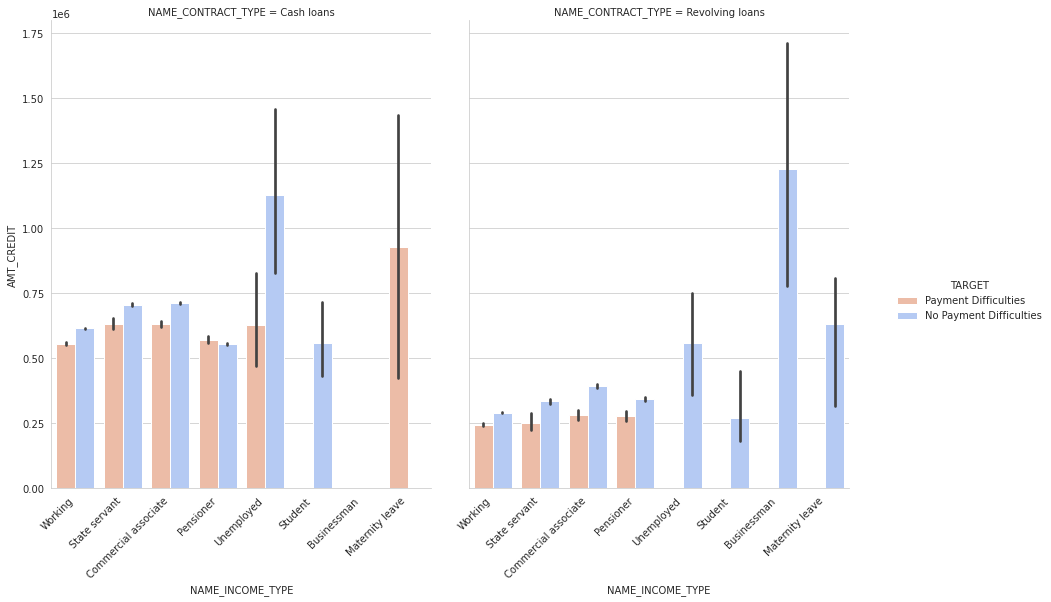

In [ ]:
# Plot variabel Income Type, Amount of Credit, Target dan Contract Type
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'coolwarm_r',
            data = df_app)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

- Untuk jenis pendapatan *maternity leave*, semua klien mengalami kesulitan dalam membayar pinjaman jenis *cash loans* untuk jumlah kredit/pinjaman menengah. Sementara semua klien tersebut tidak kesulitan dalam membayar pinjaman jenis *revolving loans*. 

- Untuk klien *Unemployed* dengan jenis pinjaman *cash loans*, lebih dari 50% klien tersebut mengalami kesulitan pembayaran pinjaman dengan jumlah pinjaman menengah. Sementara klien tersebut yang mengambil pinjaman *revolving loans* tidak mengalami kesulitan pembayaran pinjaman.

- Semua klien *Student* tidak mengalami kesulitan pembayaran pinjaman baik itu pinjaman jenis *cash loans* maupun *revolving loans* untuk jumlah pinjaman rendah hingga menengah. Namun jumlah klien ini hanya sekitar 0.0058% dari keseluruhan klien.

- Untuk klien *Businessman* hanya mengambil jenis pinjaman *revolving loans* dan tidak mengalami kesulitan pembayaran pinjaman. Klien ini rata-rata mengambil pinjaman di atas 1000000, namun jumlahnya kurang dari 0.005% dari keseluruhan klien.

#### Education Type, Amount of Credit, Target and Contract Type


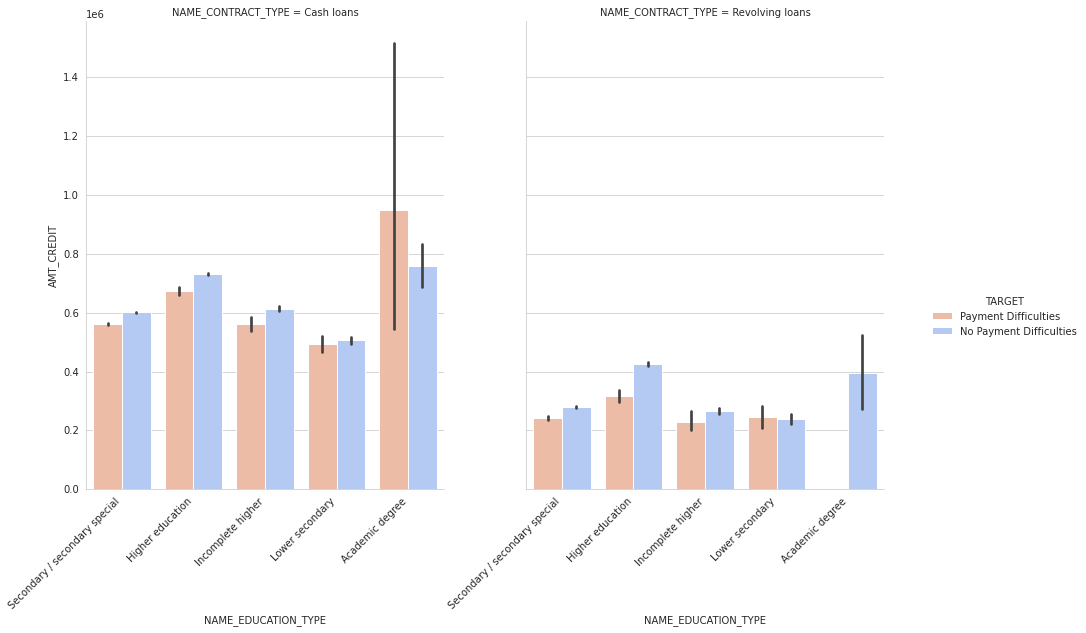

In [ ]:
# Plot variabel Education Type, Amount of Credit, Target dan Contract Type
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'coolwarm_r',
            data = df_app)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Klien dengan jenis pendidikan *Academic degree* yang mengambil pinjaman *cash loans* dengan rata-rata pinjaman/kredit di atas 800000 mengalami kesulitan dalam pembayaran pinjaman. Sementara klien tersebut tidak mengalami kesulitan pembayaran ketika mengambil jenis pinjaman *revolving loans* dengan rata-rata pinjaman sebesar 400000.

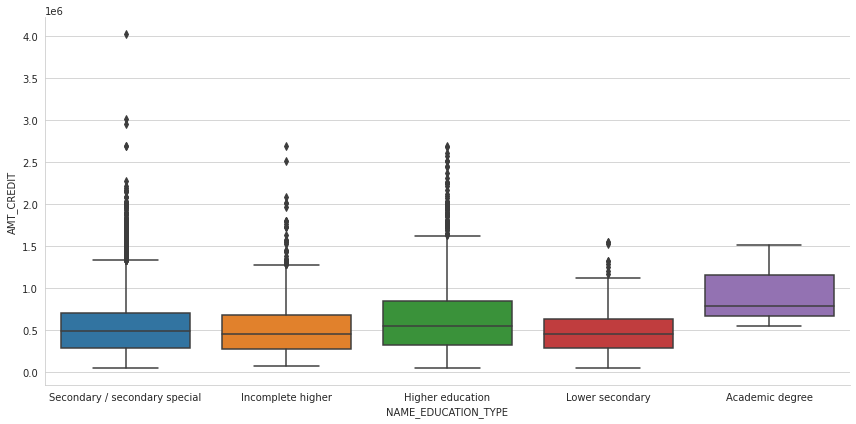

In [ ]:
sns.catplot(y="AMT_CREDIT", x="NAME_EDUCATION_TYPE", kind="box", data=df_app[df_app['TARGET'] == 'Payment Difficulties'], height=6, aspect=2)

Kebanyakan klien yang mengalami kesulitan pembayaran pinjaman mengambil pinjaman/kredit sekitar 500000, kecuali klien dengan jenis pendidikan *Academic degree* mengambil pinjaman/ kredit yang lebih besar dari nilai tersebut.

#### Income Type, Amount of Income, Target and Contract Type

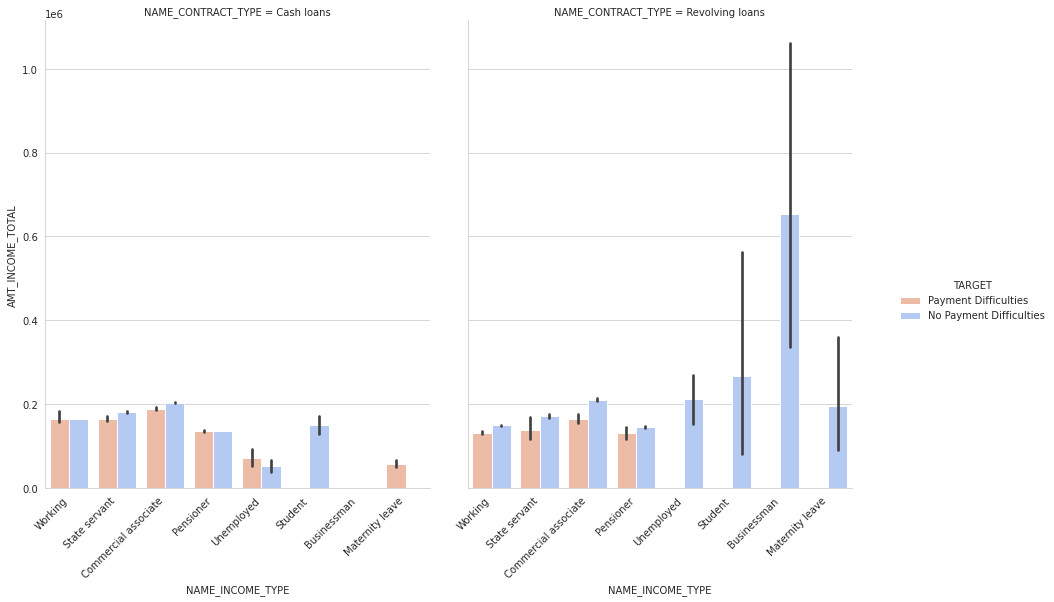

In [ ]:
# Plot variabel Education Type, Amount of Credit, Target dan Contract Type
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'coolwarm_r',
            data = df_app)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

- Klien yang berupa *Student*, *Businessman* dan *Unemployed* yang memiliki rata-rata pendapatan di atas 200000, tidak mengalami kesulitan dalam membayar pinjaman dengan tipe *revolving loans*.

- Klien dengan jenis pendapatan *Maternity leave* dan memiliki pendapatan total kurang dari 200000 mengalami kesulitan dalam membayar pinjaman dengan tipe *cash loans*. Sementara klien tersebut tidak mengalami kesulitan pembayaran pinjaman jika mengambil jenis pinjaman *revolving loans*.

- Klient dengan jenis pendapatan *Student* memiliki kemampuan dalam membayar pinjaman baik jenis pinjaman *cash loans* maupun *revolving loans*.

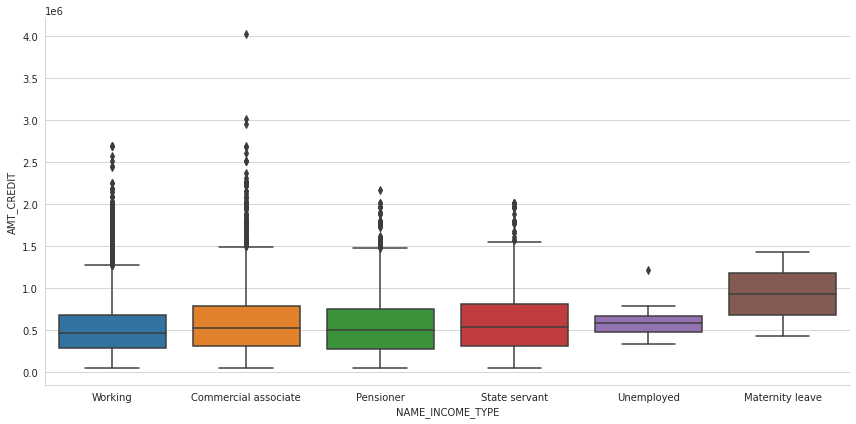

In [ ]:
sns.catplot(x="NAME_INCOME_TYPE", y="AMT_CREDIT", kind="box", data=df_app[df_app['TARGET'] == 'Payment Difficulties'], height=6,aspect=2)

Kebanyakan klien yang mengalami kesulitan pembayaran pinjaman mengambil pinjaman/kredit berpusat pada nilai ±500000, kecuali klien dengan jenis pendapatan *Maternity leave* mengambil jumlah pinjaman/kredit yang lebih besar dari nilai tersebut.

### Data Correlation

In [ ]:
# Mencari nilai korelasi antar variabel independen terhadap variabel'TARGET'
corr1 = df.corr()['TARGET'].sort_values()

# Menunjukkan lima nilai korelasi negatif terkuat
print('Features with Strongest Negative Correlation:')
corr1.head()

Features with Strongest Negative Correlation:


EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64

In [ ]:
# Menunjukkan lima nilai korelasi positif terkuat
print('Features with Strongest Positive Correlation:')
corr1.tail()

Features with Strongest Positive Correlation:


DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Berdasarkan hasil perhitungan nilai korelasi anatar variabel independen dengan variabel dependen, dapat diketahui tidak ada nilai korelasi yang sangat kuat baik itu yang bersifat korelasi positif maupun korelasi negatif.

## Data Cleaning

### Identifying Duplicate Data

In [ ]:
duplicated_dataset = df[df.duplicated()]
duplicated_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Data duplikat tidak ditemukan pada baris manapun dari dataset, maka tidak dibutuhkan proses untuk menangani data duplikat.

### Identifying Data Anomaly

Pada kolom `DAYS_EMPLOYED` ditemukan data masa kerja yang mencapai 1000.66 tahun atau 365243 hari. Data tersebut tidak masuk akal dan kemungkinan salah dalam memasukkan data.

In [ ]:
# Mengecek jumlah data yang salah
error = df[df['DAYS_EMPLOYED'] == 365243]
print('Jumlah error :', len(error))
error['TARGET'].value_counts()

Jumlah error : 55374


0    52384
1     2990
Name: TARGET, dtype: int64

In [ ]:
# Mengganti nilai yang salah dengan Nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

### Identifying Missing Values

In [ ]:
# Mengecek variabel yang memiliki missing value
mv_data = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
mv_data['Percentage'] = (mv_data['Total Null Values'] / df.shape[0])*100
mv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


In [ ]:
# Menghapus feature/kolom yang memiliki banyak missing value (±50%)
df.drop(df.iloc[:, 44:91], axis=1, inplace=True)
df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], axis=1, inplace=True)

In [ ]:
# Mengecek dataset setelah penghapusan beberapa variabel
mv_data = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
mv_data['Percentage'] = (mv_data['Total Null Values'] / df.shape[0])*100
mv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,DAYS_EMPLOYED,55374,18.007161
3,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
8,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
9,NAME_TYPE_SUITE,1292,0.420148


Setelah dilakukan penghapusan kolom/variabel yang memiliki banyak missing value, masih ada beberapa kolom yang memiliki missing value kurang dari 50%. Untuk itu kolom tersebut akan diisis dengan sebuah nilai baik itu dengan **mean** atau **median** untuk variabel numerik serta **modus** untuk variabel kategorik.

Untuk mengisi missing value pada variabel numerik perlu dicek distribusi data dan ada tidaknya outlier pada variabel tersebut untuk mengetahui apakah bisa diisi dengan mean atau median.

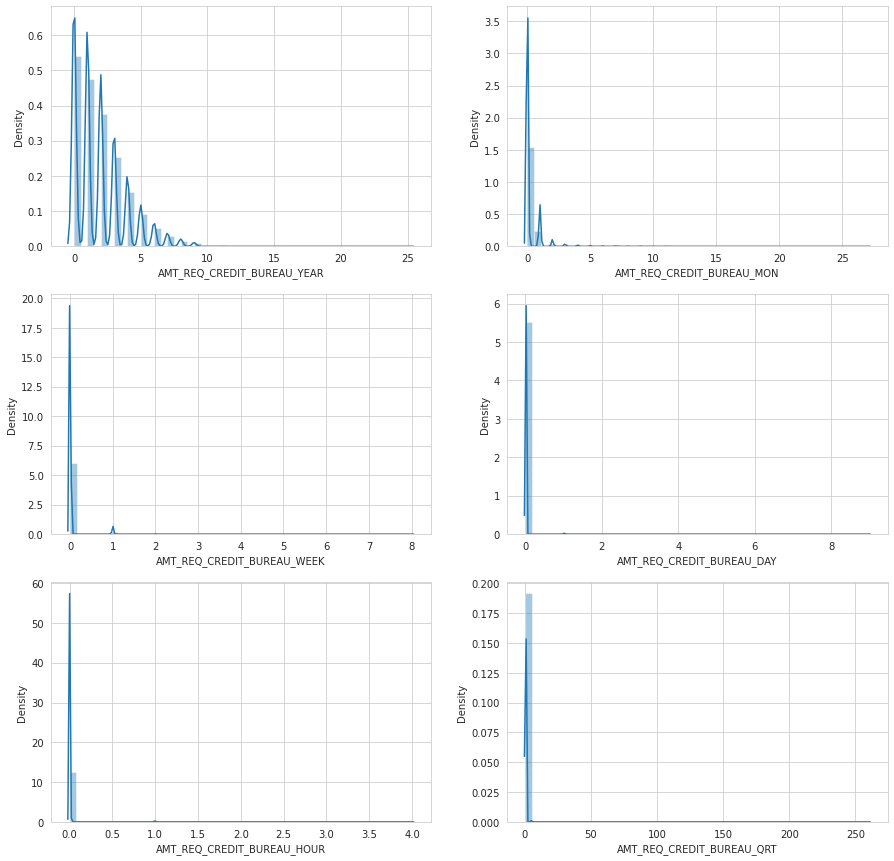

In [ ]:
# Mengecek distribusi data variabel numerik yang memiliki missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(15,15))

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[2][0])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[2][1])

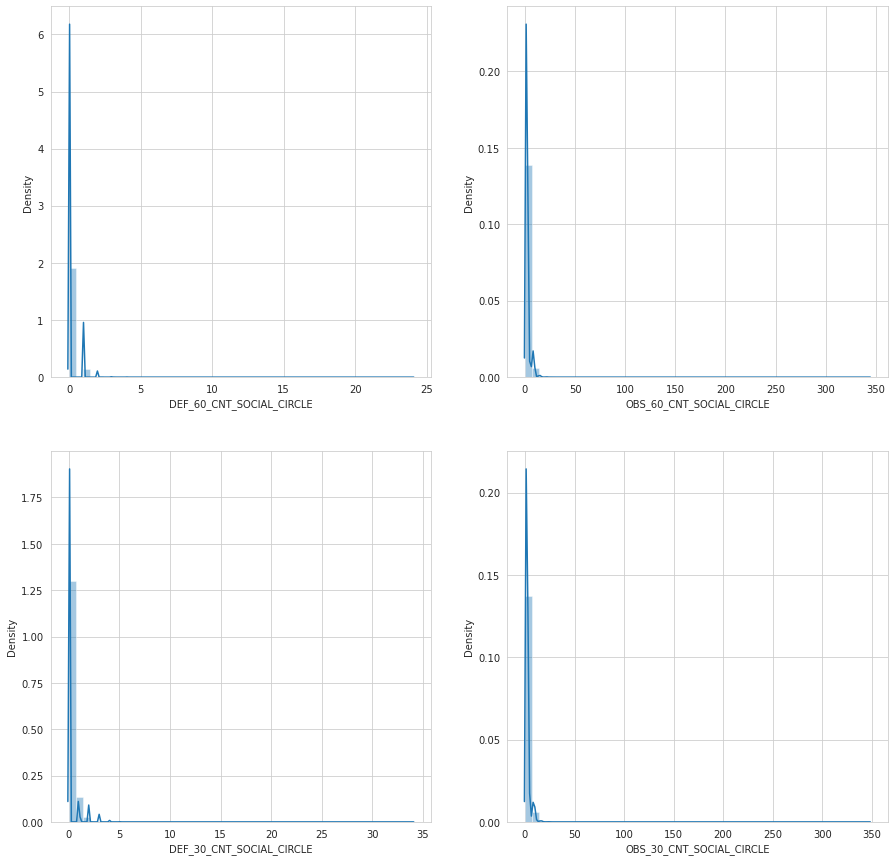

In [ ]:
# Mengecek distribusi data variabel numerik yang memiliki missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(15,15))

sns.distplot(df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(df['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(df['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

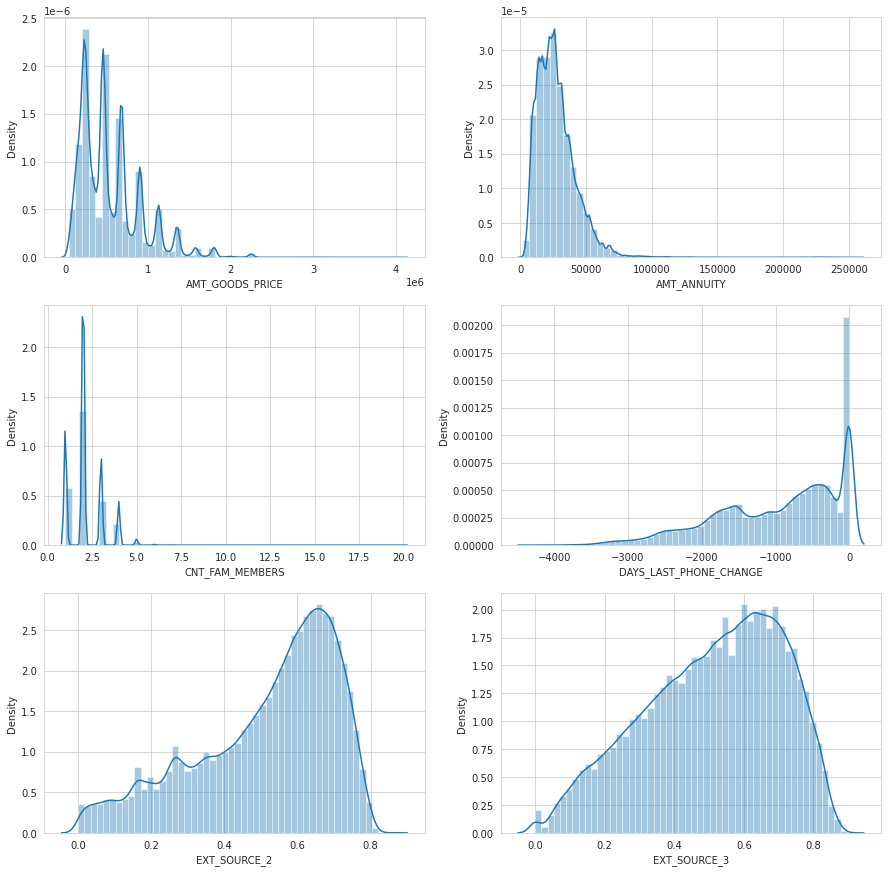

In [ ]:
# Mengecek distribusi data variabel numerik yang memiliki missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(15,15))

sns.distplot(df['AMT_GOODS_PRICE'], ax=ax[0][0])

sns.distplot(df['AMT_ANNUITY'], ax=ax[0][1])

sns.distplot(df['CNT_FAM_MEMBERS'], ax=ax[1][0])

sns.distplot(df['DAYS_LAST_PHONE_CHANGE'], ax=ax[1][1])

sns.distplot(df['EXT_SOURCE_2'], ax=ax[2][0])

sns.distplot(df['EXT_SOURCE_3'], ax=ax[2][1])

Karena semua variabel numerik yang memiliki *missing values* memiliki distribusi data yang tidak normal atau memiliki *skewness* maka nilai kosong tersebut akan diisi dengan nilai median.

In [ ]:
# Mengisi missing values dengan median untuk variabel numerik
# Mengisi missing values dengan modus untuk variabel kategorik

numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
category_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in df:
    if df[feature].isnull().any():
        if(feature in category_features):
            df[feature]=df[feature].fillna(df[feature].mode()[0])
        else:
            df[feature]=df[feature].fillna(df[feature].median())

In [ ]:
# Mengecek dataset setelah dilakukan pengisisan pada beberapa variabel
mv_data = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
mv_data['Percentage'] = (mv_data['Total Null Values'] / df.shape[0])*100
mv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


### Identifying Outliers

Penentuan suatu nilai *outlier* dapat dilakukan dengan menganalisis nilai batas bawah dan batas atas dari suatu data. Kedua nilai tersebut bergantung pada nilai Rentang Interkuartil (IQR), dimana IQR didapat dengan mengurangi nilai kuartil ketiga (Q3) dengan kuartil pertama (Q1). Nilai batas atas didapat dengan rumus Q3 + 1,5xIQR, sementara batas bawah didapat dengan rumus Q1 - 1,5xIQR. Apabila nilai suatu sampel berada di bawah batas bawah dan di atas batas atas maka termasuk *outlier*.

In [ ]:
# Menghitung jumlah data outliers yang ada dari setiap variabel numerik
def find_outlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)

    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outlier = []
    for i in range(len(data)):
        if data[i] > upper_limit:
            outlier.append(data[i])
        if data[i] < lower_limit:
            outlier.append(data[i])
    return len(outlier)

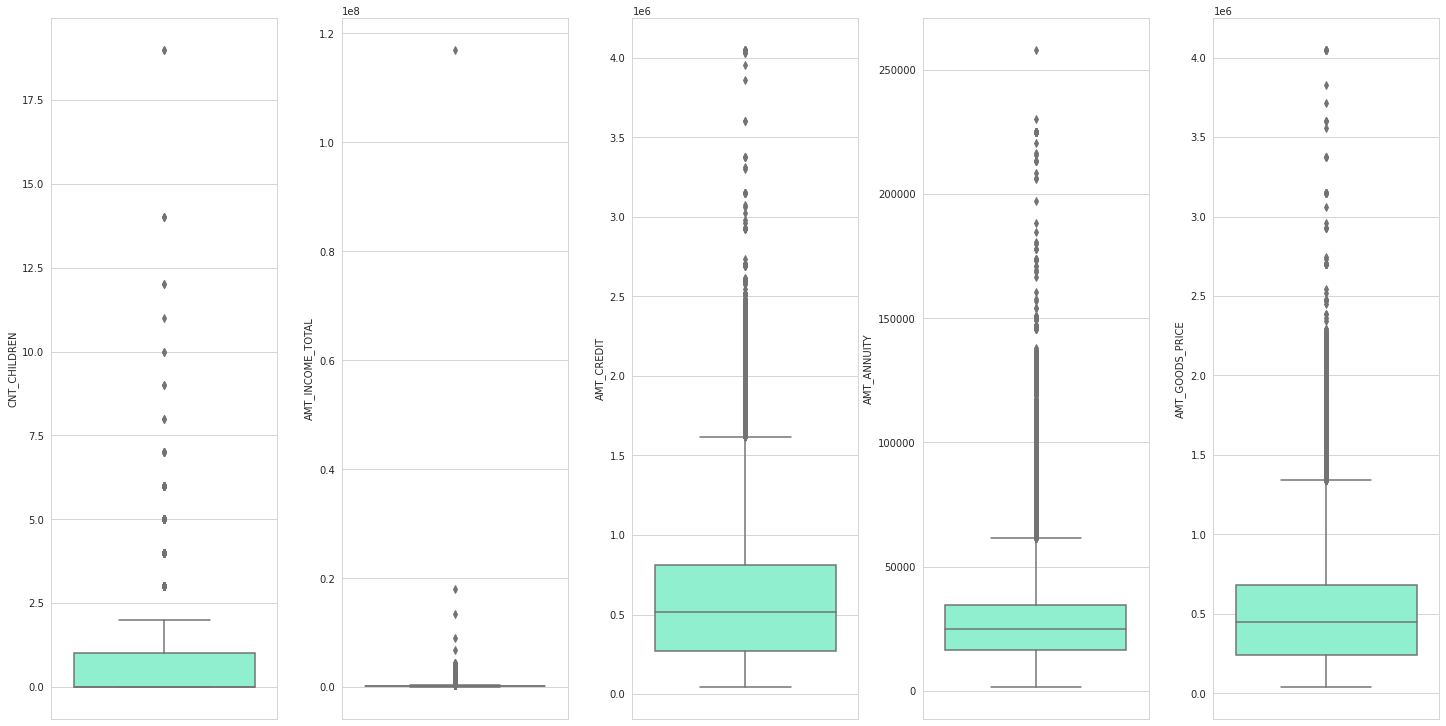

In [ ]:
# Membuat boxplot untuk mengecek outlier
num_features = df[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, color = 'aquamarine', ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel CNT_CHILDREN: 4272 

Jumlah outlier pada variabel AMT_INCOME_TOTAL: 14035 

Jumlah outlier pada variabel AMT_CREDIT: 6562 

Jumlah outlier pada variabel AMT_ANNUITY: 7504 

Jumlah outlier pada variabel AMT_GOODS_PRICE: 14728 



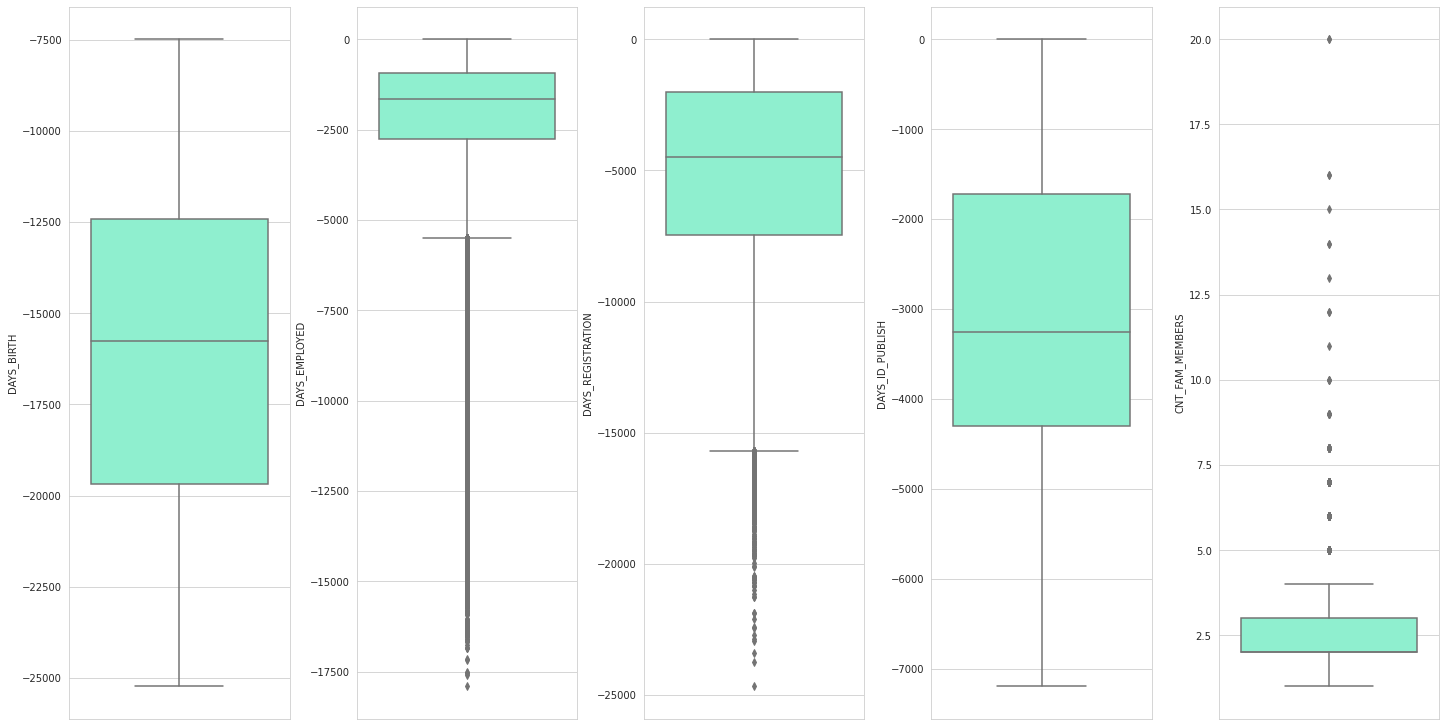

In [ ]:
# Membuat boxplot untuk mengecek outlier
num_features = df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, color = 'aquamarine', ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel DAYS_BIRTH: 0 

Jumlah outlier pada variabel DAYS_EMPLOYED: 23148 

Jumlah outlier pada variabel DAYS_REGISTRATION: 659 

Jumlah outlier pada variabel DAYS_ID_PUBLISH: 0 

Jumlah outlier pada variabel CNT_FAM_MEMBERS: 4007 



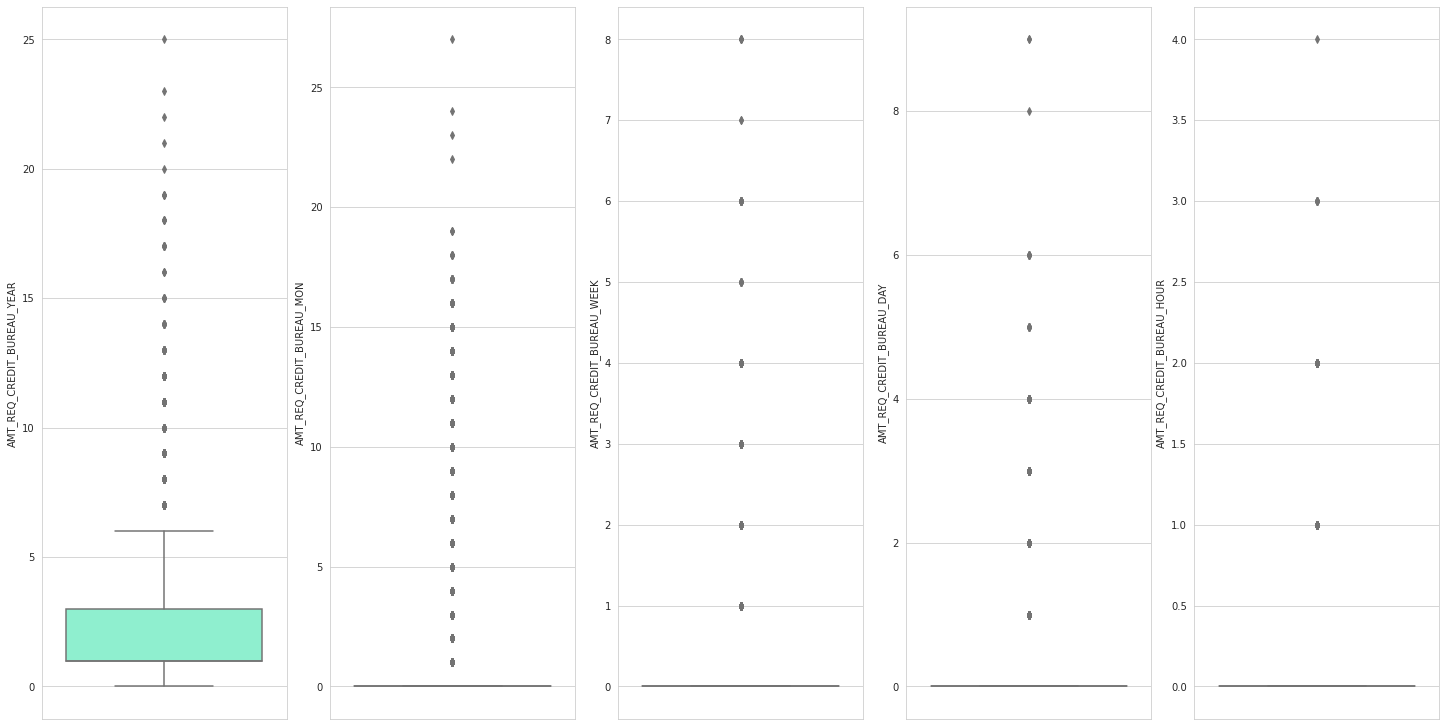

In [ ]:
# Membuat boxplot untuk mengecek outlier
num_features = df[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, color = 'aquamarine', ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_YEAR: 7233 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_MON: 43759 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_WEEK: 8536 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_DAY: 1489 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_HOUR: 1626 



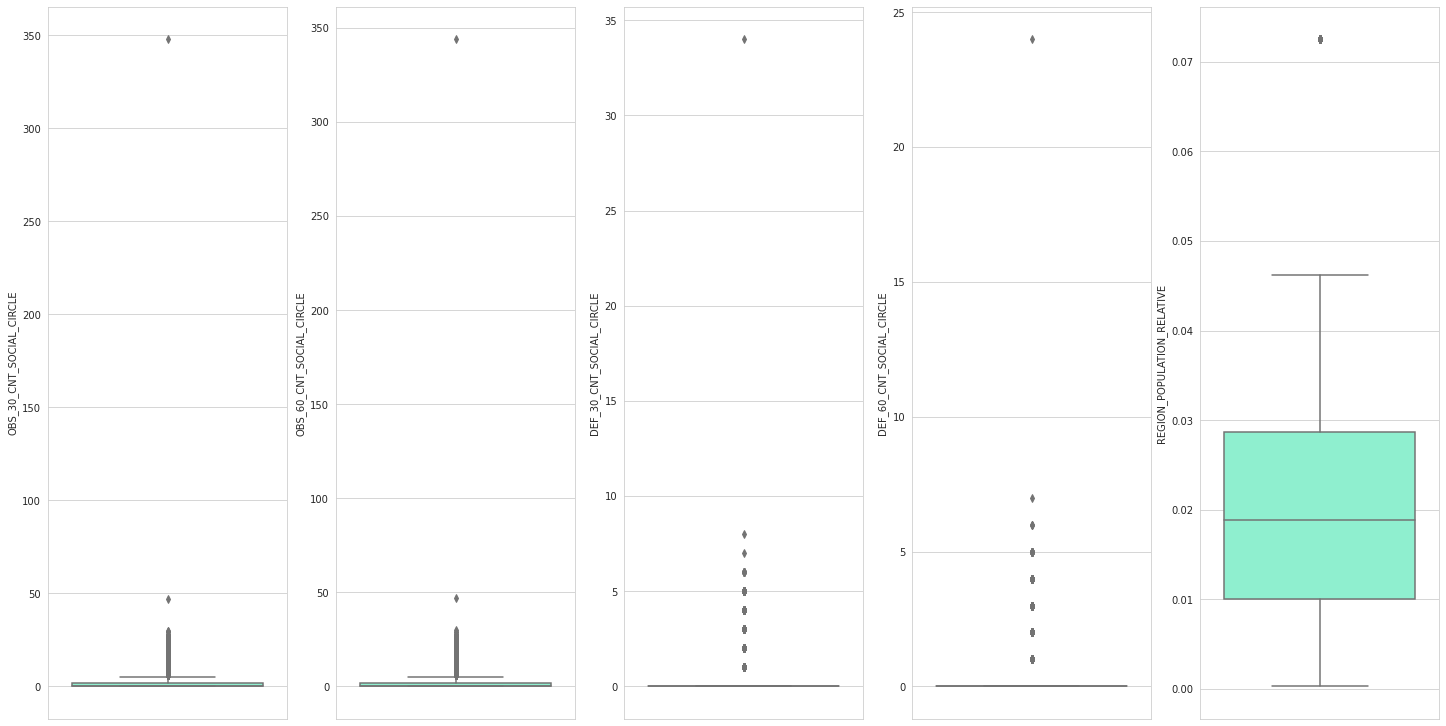

In [ ]:
# Membuat boxplot untuk mengecek outlier
num_features = df[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, color = 'aquamarine', ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel OBS_30_CNT_SOCIAL_CIRCLE: 19971 

Jumlah outlier pada variabel OBS_60_CNT_SOCIAL_CIRCLE: 19564 

Jumlah outlier pada variabel DEF_30_CNT_SOCIAL_CIRCLE: 35166 

Jumlah outlier pada variabel DEF_60_CNT_SOCIAL_CIRCLE: 25769 

Jumlah outlier pada variabel REGION_POPULATION_RELATIVE: 8412 



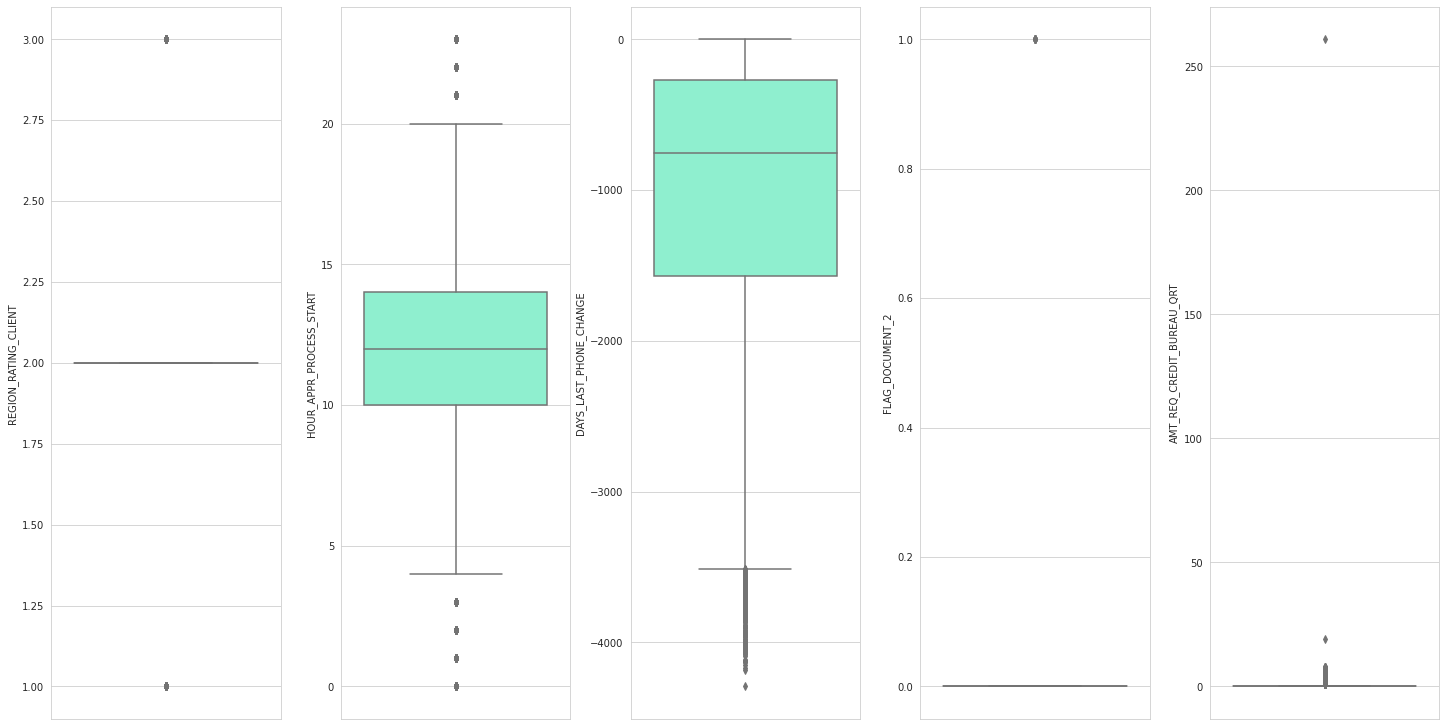

In [ ]:
# Membuat boxplot untuk mengecek outlier
num_features = df[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_features.items():
    sns.boxplot(y = k, data = num_features, color = 'aquamarine', ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel REGION_RATING_CLIENT: 80527 

Jumlah outlier pada variabel HOUR_APPR_PROCESS_START: 2257 

Jumlah outlier pada variabel DAYS_LAST_PHONE_CHANGE: 435 

Jumlah outlier pada variabel FLAG_DOCUMENT_2: 13 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_QRT: 50575 



Dari hasil pemeriksaan di atas dapat diketahui bahwa terdapat banyak nilai *outlier* pada variabel numerik. Dikarenakan nilai *outlier* banyak ditemukan pada dataset dan bukan mengindikasikan nilai yang memang salah atau semua nilai numerik pada kolom tersebut masuk akal dan dalam kisaran yang diharapkan dalam kaitannya dengan studi kasus superstore sehingga *outlier* tidak perlu dihapus.

## Machine Learning Models

### Data Preprocessing

#### Convert Negative Values to Positive Values

Kolom/variabel yang memiliki nilai negatif yaitu `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION`, dan `DAYS_LAST_PHONE_CHANGE`.

In [ ]:
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']] = df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].abs()

In [ ]:
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
0,9461,637.0,2120,3648.0,1134.0
1,16765,1188.0,291,1186.0,828.0
2,19046,225.0,2531,4260.0,815.0
3,19005,3039.0,2437,9833.0,617.0
4,19932,3038.0,3458,4311.0,1106.0


#### Label Encoding

In [ ]:
# Melakukan proses encoding pada variabel kategorik
df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637.0,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225.0,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039.0,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038.0,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Drop Unnecessary Feature

In [ ]:
df.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [ ]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637.0,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225.0,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039.0,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038.0,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Feature Selection

In [ ]:
# Memisahkan variabel independen dan variabel dependen (label)
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [ ]:
# Memilih variabel independen (feature) terbaik untuk pemodelan
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X, y)

df_features = pd.DataFrame({
              'Features' : X.columns,
              'Score' : fit.scores_}) 
df_features.sort_values(by=['Score'], ascending=False) 

,Features,Score
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
16,DAYS_EMPLOYED,2.502588e+06
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


Berdasarkan tabel di atas maka:
- Lima variabel independen (feature) tertinggi : `AMT_GOODS_PRICE`, `AMT_CREDIT`, `DAYS_EMPLOYED`, `DAYS_BIRTH` dan `AMT_INCOME_TOTAL`
- Lima variabel independen (feature) terendah : `FLAG_MOBIL`, `FLAG_CONT_MOBILE`, `AMT_REQ_CREDIT_BUREAU_HOUR`, `FLAG_DOCUMENT_20` dan `FLAG_DOCUMENT_5`

Untuk pembuatan model akan digunakan 20 variabel independen dengan nilai tertinggi.

#### Handling Imbalanced Data

Untuk mengatasi *imbalanced data* dapat digunakan teknik **Random Over Sampling**. Teknik ini dilakukan dengan menduplikasi secara acak berulang-ulang kelas minoritas hingga distribusi kelas menjadi lebih seimbang.

In [ ]:
# Membuat dua dataframe berbeda untuk kelas mayoritas dan kelas minoritas
df_majority = df[df['TARGET'] == 0]
df_minority = df[df['TARGET'] == 1]

# Menambah sampel untuk kelas minoritas
df_minority_oversample = resample(df_minority,
                                  replace=True,
                                  n_samples=len(df_majority), # Jumlah dari kelas mayoritas
                                  random_state=42)

# Menggabungkan kelas mayoritas dengan kelas minoritas yang sudah ditambah jumlah sampelnya
df_oversampled = pd.concat([df_minority_oversample, df_majority])

df_oversampled['TARGET'].value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

Terlihat jumlah data antara kelas minoritas (TARGET = 1) sudah sama (seimbang) dengan jumlah data kelas mayoritas (TARGET = 0).

### Data Splitting

In [ ]:
# Menyiapkan dataset untuk pemodelan dberdasarkan 20 fitur terbaik
X_balanced = df_oversampled[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_EMPLOYED', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                           'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                           'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_oversampled['TARGET']

In [ ]:
# Membagi data (splitting data)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, stratify = y_balanced, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [ ]:
# Melakukan proses normalisasi pada dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build Model

Beberapa algoritma yang akan digunakan untuk pemodelan, antara lain:
1. Logistic Regression
2. Decision Tree Classifier
3. XGBoost Classifier
4. Random Forest Classifier
5. Support Vector Classification (SVC)

In [ ]:
# Classification metrics : digunakan untuk mengevaluasi model
def classification_results(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print('Precision: ', round(precision, 4))
    print('Recall   : ', round(recall, 4))
    print('F1-score : ', round(f1score, 4))
    print('Accuracy : ', round(accuracy, 4))
    print('AUC score: ', round(auc, 4))

#### **Logistic Regression**

In [ ]:
# Melakukan proses pembuatan model : Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_train_log = logreg_model.predict(X_train)
y_pred_test_log = logreg_model.predict(X_test)

In [ ]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_log)

Classification Metrics for Training Model:
Precision:  0.6766
Recall   :  0.6625
F1-score :  0.6695
Accuracy :  0.6729
AUC score:  0.6729


In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_log)

Classification Metrics for Testing Model:
Precision:  0.6779
Recall   :  0.6598
F1-score :  0.6687
Accuracy :  0.6731
AUC score:  0.6731


In [ ]:
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_pred_test_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     56538
           1       0.68      0.66      0.67     56537

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



In [ ]:
# Membuat dataframe untuk confusion matrix
cm_log = pd.DataFrame((confusion_matrix(y_test, y_pred_test_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_log

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,38812,17726
Payment Difficulties,19236,37301


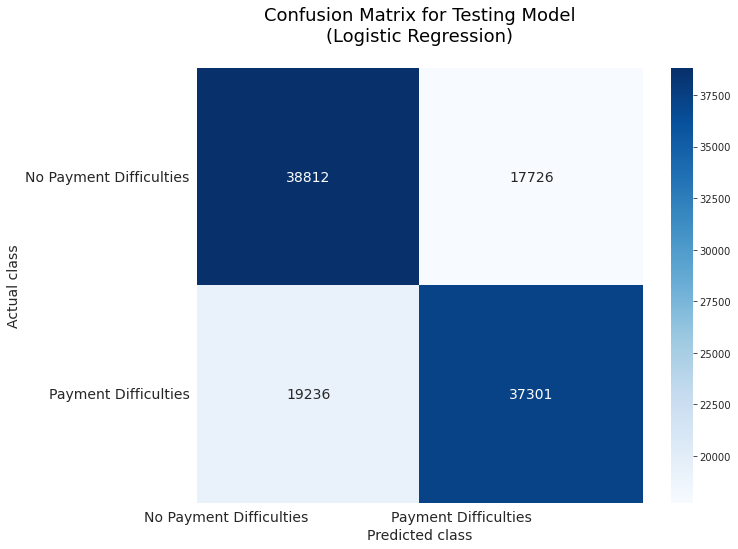

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

#### **Decision Tree Classifier**

In [ ]:
# Melakukan proses pembuatan model : Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

In [ ]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_dt)

Classification Metrics for Training Model:
Precision:  1.0
Recall   :  1.0
F1-score :  1.0
Accuracy :  1.0
AUC score:  1.0


In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_dt)

Classification Metrics for Testing Model:
Precision:  0.9156
Recall   :  0.9999
F1-score :  0.9559
Accuracy :  0.9538
AUC score:  0.9538


In [ ]:
# Print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_pred_test_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56538
           1       0.92      1.00      0.96     56537

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075



In [ ]:
# Membuat dataframe untuk confusion matrix
cm_dt = pd.DataFrame((confusion_matrix(y_test, y_pred_test_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_dt

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,51324,5214
Payment Difficulties,7,56530


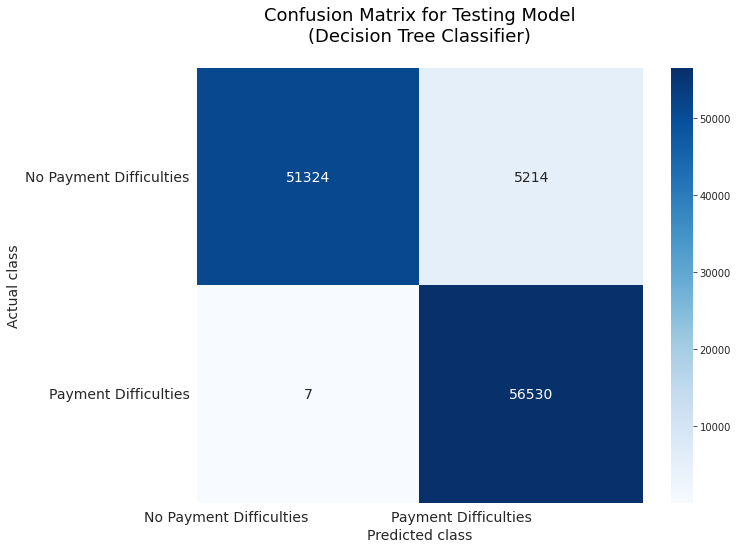

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

#### **XGBoost Classifier**

In [ ]:
# Melakukan proses pembuatan model : XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

In [ ]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_xgb)

Classification Metrics for Training Model:
Precision:  0.6853
Recall   :  0.6843
F1-score :  0.6848
Accuracy :  0.685
AUC score:  0.685


In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_xgb)

Classification Metrics for Testing Model:
Precision:  0.6852
Recall   :  0.6803
F1-score :  0.6827
Accuracy :  0.6839
AUC score:  0.6839


In [ ]:
# Print classification report
print('Classification Report Testing Model (XGBoost Classifier):')
print(classification_report(y_test, y_pred_test_xgb))

Classification Report Testing Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.68      0.69      0.69     56538
           1       0.69      0.68      0.68     56537

    accuracy                           0.68    113075
   macro avg       0.68      0.68      0.68    113075
weighted avg       0.68      0.68      0.68    113075



In [ ]:
# Membuat dataframe untuk confusion matrix
cm_xgb = pd.DataFrame((confusion_matrix(y_test, y_pred_test_xgb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_xgb

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,38870,17668
Payment Difficulties,18076,38461


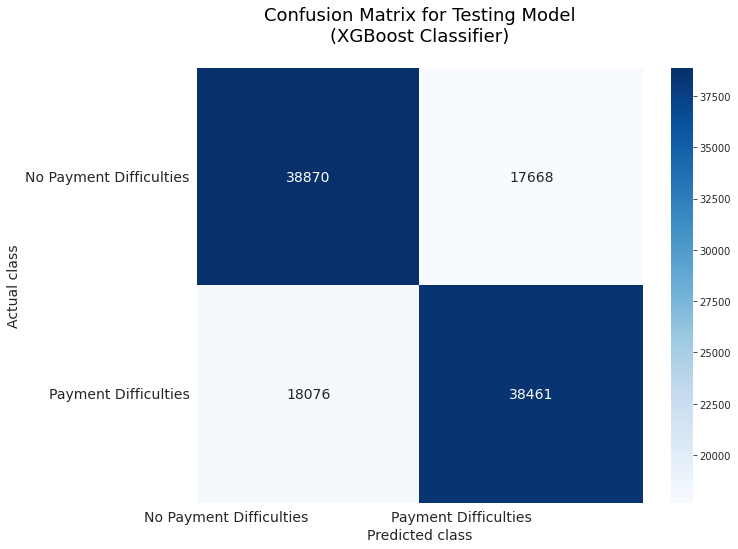

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_xgb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(XGBoost Classifier)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

#### **Random Forest Classifier**

In [ ]:
# Melakukan proses pembuatan model : Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_rf)

Classification Metrics for Training Model:
Precision:  1.0
Recall   :  1.0
F1-score :  1.0
Accuracy :  1.0
AUC score:  1.0


In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_rf)

Classification Metrics for Testing Model:
Precision:  0.9941
Recall   :  0.9999
F1-score :  0.997
Accuracy :  0.997
AUC score:  0.997


In [ ]:
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_pred_test_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56538
           1       0.99      1.00      1.00     56537

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



In [ ]:
# Membuat dataframe untuk confusion matrix
cm_rf = pd.DataFrame((confusion_matrix(y_test, y_pred_test_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_rf

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,56201,337
Payment Difficulties,7,56530


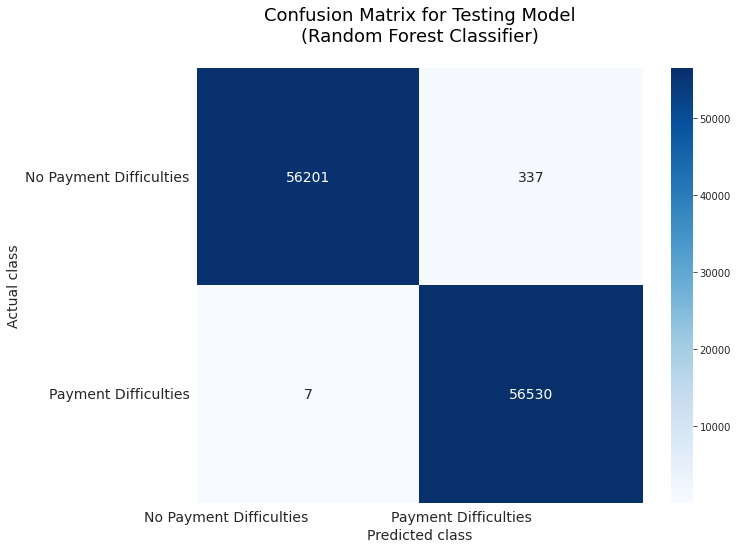

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

### Hyperparameter Tuning

#### **Logistic Regression - Tuned**

In [ ]:
# Melakukan hyperparameter tuning dangan metode Grid Search(mencoba seluruh kombinasi hyperparameter)
logreg = LogisticRegression()

param_logreg = {'C' : [1, 0.5, 0.1, 0.05],
               'penalty' :['l2','l1', 'elasticnet', 'none'],
               'class_weight' : [dict, 'balanced'],
               'max_iter' : [10, 100, 500]}


logreg_model_tuned = GridSearchCV(estimator = logreg, param_grid = param_logreg, 
                                  cv = 5, n_jobs = -1 , verbose = 1, scoring = 'f1')
logreg_model_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 0.05],
                         'class_weight': [<class 'dict'>, 'balanced'],
                         'max_iter': [10, 100, 500],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='f1', verbose=1)

In [ ]:
# Melihat parameter terbaik
logreg_model_tuned.best_params_

{'C': 1, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l2'}

In [ ]:
# Melakukan pemodelan logistic regression berdasarkan best estimator
logreg_tuned = logreg_model_tuned.best_estimator_
logreg_tuned.fit(X_train, y_train)

y_pred_train_log_tuned = logreg_tuned.predict(X_train)
y_pred_test_log_tuned = logreg_tuned.predict(X_test)

In [ ]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_log_tuned)

Classification Metrics for Training Model:
Precision:  0.6768
Recall   :  0.6624
F1-score :  0.6695
Accuracy :  0.6731
AUC score:  0.6731


In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_log_tuned)

Classification Metrics for Testing Model:
Precision:  0.6768
Recall   :  0.6587
F1-score :  0.6677
Accuracy :  0.6721
AUC score:  0.6721


In [ ]:
# Print classification report
print('Classification Report Testing Model (Logistic Regression-Tuned):')
print(classification_report(y_test, y_pred_test_log_tuned))

Classification Report Testing Model (Logistic Regression-Tuned):
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     56538
           1       0.68      0.66      0.67     56537

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



In [ ]:
# Membuat dataframe untuk confusion matrix
cm_log_tuned = pd.DataFrame((confusion_matrix(y_test, y_pred_test_log_tuned)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_log_tuned

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,38754,17784
Payment Difficulties,19294,37243


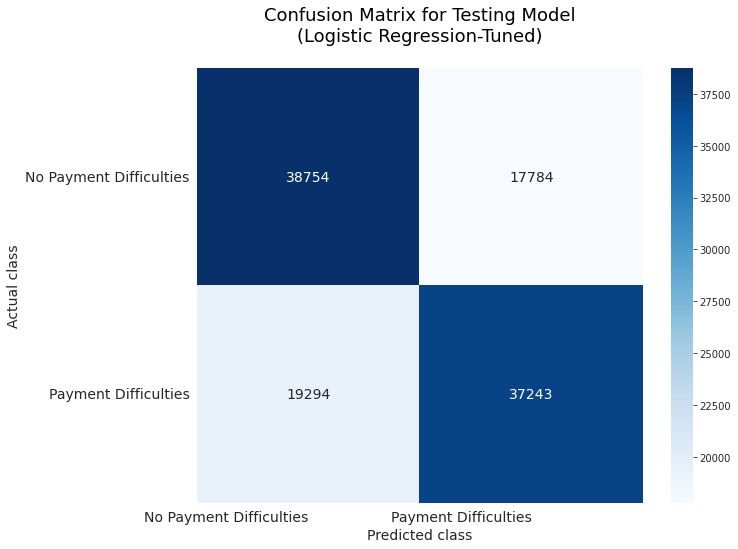

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_log_tuned, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression-Tuned)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

#### **Decision Tree Classifier - Tuned**

In [ ]:
# Melakukan hyperparameter tuning dangan metode Grid Search(mencoba seluruh kombinasi hyperparameter)
dt = DecisionTreeClassifier()
param_dt = {"max_depth": [1, 2, 3, 4, None],
            "criterion": ["gini", "entropy"] 
           }

dt_model_tuned = GridSearchCV(estimator = dt, param_grid = param_dt, cv = 5, 
                          n_jobs = -1 , verbose = 1, scoring = 'f1')

dt_model_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, None]},
             scoring='f1', verbose=1)

In [ ]:
# Melihat parameter terbaik
dt_model_tuned.best_params_

{'criterion': 'gini', 'max_depth': None}

In [ ]:
# Melakukan pemodelan decision tree classifier berdasarkan best estimator
dt_tuned = dt_model_tuned.best_estimator_
dt_tuned.fit(X_train, y_train)

y_pred_train_dt_tuned = dt_tuned.predict(X_train)
y_pred_test_dt_tuned = dt_tuned.predict(X_test)

In [ ]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_dt_tuned)

Classification Metrics for Training Model:
Precision:  1.0
Recall   :  1.0
F1-score :  1.0
Accuracy :  1.0
AUC score:  1.0


In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_dt_tuned)

Classification Metrics for Testing Model:
Precision:  0.9155
Recall   :  0.9999
F1-score :  0.9558
Accuracy :  0.9538
AUC score:  0.9538


In [ ]:
# Print classification report
print('Classification Report Testing Model (Decision Tree Classifier-Tuned):')
print(classification_report(y_test, y_pred_test_dt_tuned))

Classification Report Testing Model (Decision Tree Classifier-Tuned):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56538
           1       0.92      1.00      0.96     56537

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075



In [ ]:
# Membuat dataframe untuk confusion matrix
cm_dt_tuned = pd.DataFrame((confusion_matrix(y_test, y_pred_test_dt_tuned)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_dt_tuned

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,51319,5219
Payment Difficulties,7,56530


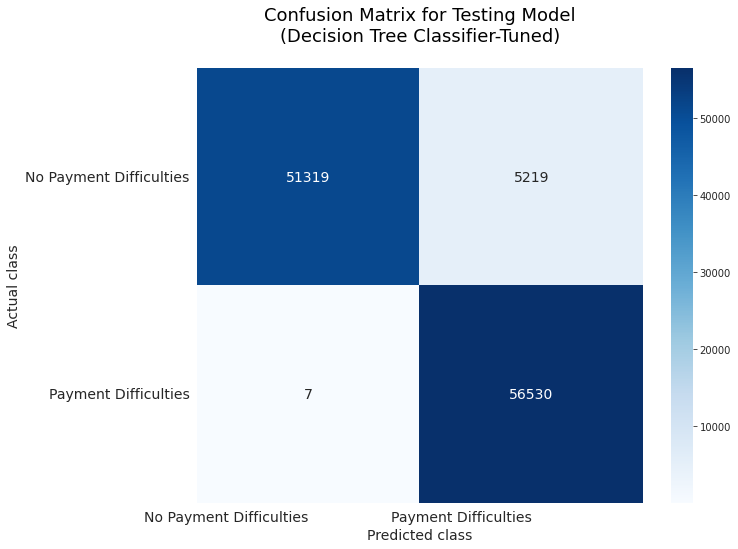

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_dt_tuned, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier-Tuned)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

### Model Selection

In [ ]:
# Menampilkan hasil evaluasi testing model
comp_table = pd.DataFrame([['Logistic Regression', 0.6687, 0.6731, 0.6731],
                        ['Decision Tree Classifier', 0.9559, 0.9538, 0.9538],
                        ['XGBoost Classifier', 0.6827, 0.6839, 0.6839],
                        ['Random Forest Classifier', 0.9970, 0.9970, 0.9970],
                        ['Logistic Regression-Tuned', 0.6677, 0.6721, 0.6721],
                        ['Decision Tree Classifier-Tuned', 0.9558, 0.9538, 0.9538]], 
                        columns = ['Model', 'F1-Score', 'Accuracy Score', 'AUC Score'])

comp_table

,Model,F1-Score,Accuracy Score,AUC Score
0,Logistic Regression,0.6687,0.6731,0.6731
1,Decision Tree Classifier,0.9559,0.9538,0.9538
2,XGBoost Classifier,0.6827,0.6839,0.6839
3,Random Forest Classifier,0.9970,0.9970,0.9970
4,Logistic Regression-Tuned,0.6677,0.6721,0.6721
5,Decision Tree Classifier-Tuned,0.9558,0.9538,0.9538


Berdasarkan tabel perbandingan evaluasi model di atas, maka model **Random Forest Classifier** akan digunakan sebagai model untuk memprediksi kemampuan pembayaran pinjaman klien. Model tersebut dipilih karena memiliki nilai F1-score, accuracy dan auc score yang lebih tinggi dibanding model lainnya.

### Final Model

Model **Random Forest Classifier** dipilih sebagai model terbaik.

#### Prediction Table from Best Model

In [ ]:
# Tabel perbandingan nilai aktual dan prediksi
ypr = rf_model.predict(X_test)
df_results = pd.DataFrame({'actual': y_test, 'pred': ypr}, dtype='int64')
df_results.sort_values('actual',inplace=True)
df_results.reset_index(inplace=True)
df_results.head(10)

,index,actual,pred
0,200140,0,0
1,283373,0,0
2,97340,0,0
3,232489,0,0
4,189504,0,0
5,158636,0,0
6,163113,0,0
7,48060,0,0
8,99216,0,0
9,29099,0,0


#### Confusion Matrix from Best Model

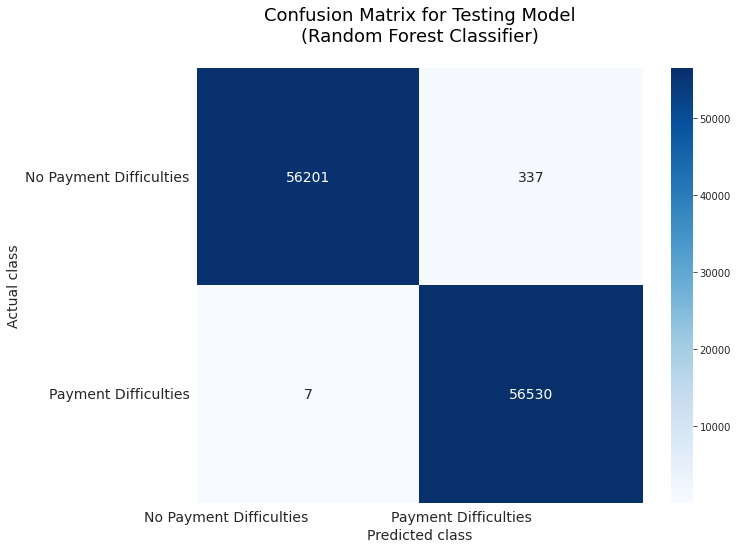

In [ ]:
# Plot untuk confusion matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)\n', fontsize=18, color='black')
plt.ylabel('Actual class', fontsize=14)
plt.xlabel('Predicted class', fontsize=14)
plt.show()

#### Feature Rangking from Best Model

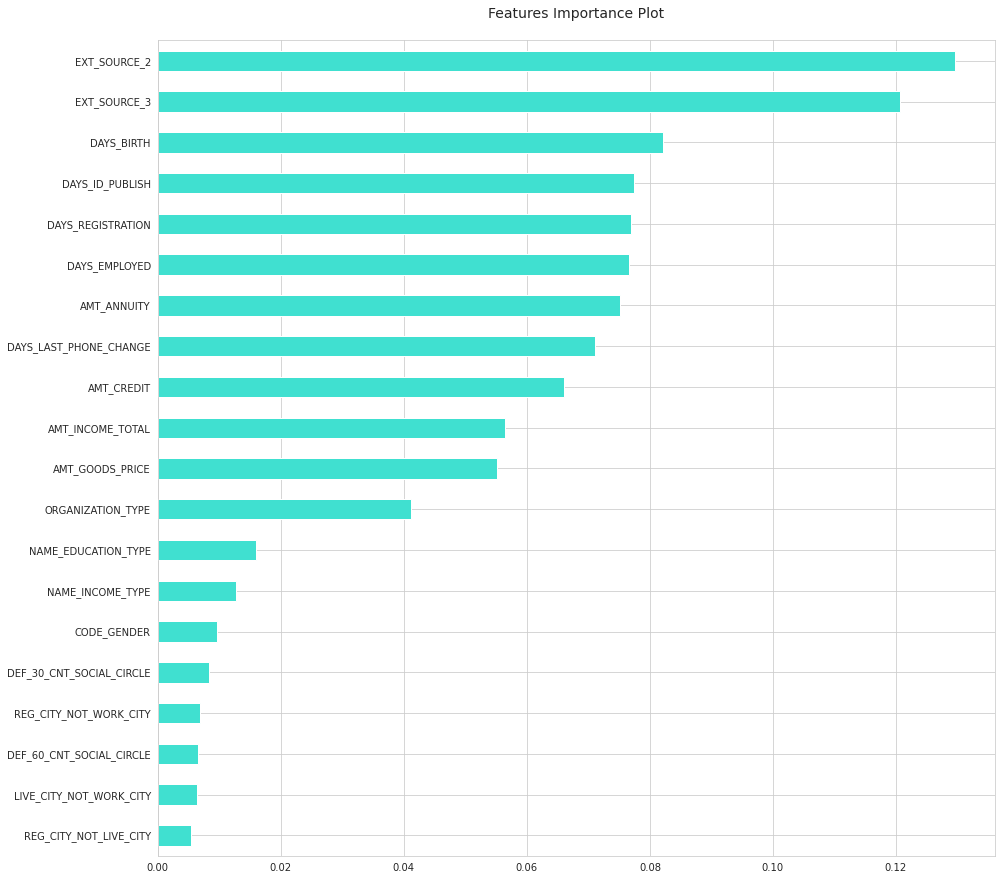

In [ ]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X_balanced.columns).sort_values(ascending=True)

plt.figure(figsize=(15,15))
fig = importances_rf.plot(kind ='barh', color ='turquoise')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

Berdasarkan plot di atas 5 *feature* terpenting yaitu `EXT_SOURCE_2`, `EXT_SOURCE_3`, `DAYS_BIRTH`, `DAYS_ID_PUBLISH`, dan `DAYS_REGISTRATION`

## **Prediction**

### Import Dataset

In [ ]:
# Load dataset
df_test = pd.read_csv('/content/drive/MyDrive/Rakamin/Home_Credit/application_test.csv')

# Menampilkan 5 baris pertama dari dataset
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
# Memberikan informasi setiap kolom dan tipe data dari dataset
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [ ]:
# Menunjukkan jumlah baris dan kolom dari dataset
print("Jumlah baris: {}\nJumlah kolom: {}".format(df_test.shape[0], df_test.shape[1]))

Jumlah baris: 48744
Jumlah kolom: 121


Dataset **application_test.csv** akan digunakan sebagi data tes dalam prediksi label. Data tersebut berisi data statis untuk semua permohonan pinjaman. Setiap baris merepresentasikan satu pinjaman. Data tersebut memiliki 48744 baris dan 121 kolom (tanpa kolom 'TARGET').

### Data Preprocessing

#### Identifying Duplicate Data

In [ ]:
duplicated_dataset = df_test[df_test.duplicated()]
duplicated_dataset

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Data duplikat tidak ditemukan pada baris manapun dari dataset, maka tidak dibutuhkan proses untuk menangani data duplikat.

#### Identifying Missing Values

In [ ]:
# Mengecek variabel yang memiliki missing value
tmv_data = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tmv_data['Percentage'] = (tmv_data['Total Null Values'] / df_test.shape[0])*100
tmv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MODE,32780,67.249302
9,LIVINGAPARTMENTS_MEDI,32780,67.249302


In [ ]:
# Menghapus feature/kolom yang memiliki banyak missing value (±50%)
df_test.drop(df_test.iloc[:, 43:90], axis=1, inplace=True)
df_test.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], axis=1, inplace=True)

In [ ]:
# Mengecek variabel yang memiliki missing value
tmv_data = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tmv_data['Percentage'] = (tmv_data['Total Null Values'] / df_test.shape[0])*100
tmv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
5,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
6,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
7,AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.409732
8,NAME_TYPE_SUITE,911,1.868948
9,OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495


In [ ]:
# Mengisi missing values dengan median untuk variabel numerik
# Mengisi missing values dengan modus untuk variabel kategorik

numeric_features = df_test.select_dtypes(include=['int64','float64']).columns.tolist()
category_features = df_test.select_dtypes(include=['object']).columns.tolist()

for feature in df_test:
    if df_test[feature].isnull().any():
        if(feature in category_features):
            df_test[feature]=df_test[feature].fillna(df_test[feature].mode()[0])
        else:
            df_test[feature]=df_test[feature].fillna(df_test[feature].median())

In [ ]:
# Mengecek dataset setelah dilakukan pengisisan pada beberapa variabel
tmv_data = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tmv_data['Percentage'] = (tmv_data['Total Null Values'] / df_test.shape[0])*100
tmv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


#### Convert Negative Values to Positive Values

Kolom/variabel yang memiliki nilai negatif yaitu `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION`, dan `DAYS_LAST_PHONE_CHANGE`.

In [ ]:
df_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']] = df_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].abs()

In [ ]:
df_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
0,19241,2329,812,5170.0,1740.0
1,18064,4469,1623,9118.0,0.0
2,20038,4458,3503,2175.0,856.0
3,13976,1866,4208,2000.0,1805.0
4,13040,2191,4262,4000.0,821.0


#### Label Encoding

In [ ]:
# Melakukan proses encoding pada variabel kategorik
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### Prediction

In [ ]:
# Menyiapkan data untuk tes untuk model
data_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
data_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [ ]:
# Melakukan proses prediksi 
predict = pd.Series(rf_model.predict(data_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


## Recommendations

**Insights** :

1. Klien yang tidak kesulitan dalam pembayaran pinjaman paling banyak berada pada rentang usia 35-45 tahun.
2. Klien dengan jenis pekerjaan *accountant*, *high skill tech staff* dan *manager* memiliki peluang terendah untuk kesulitan pembayaran pinjaman (lebih dari 93% dari masing-masing tipe klien tidak kesulitan membayar pinjaman). Namun jumlah masing-masing ketiga klien tersebut kurang dari 10% dari keseluruhan klien.
3. Semua klien *student* tidak mengalami kesulitan pembayaran pinjaman baik itu pinjaman jenis *cash loans* maupun *revolving loans* untuk jumlah pinjaman rendah hingga menengah. Namun jumlah klien ini hanya sekitar 0.0058% dari keseluruhan klien.
4. Untuk klien *businessman* hanya mengambil jenis pinjaman *revolving loans* dan tidak mengalami kesulitan pembayaran pinjaman. Klien ini rata-rata mengambil pinjaman di atas 1000000, namun jumlahnya kurang dari 0.005% dari keseluruhan klien.
5. Semua klien dengan jenis pendapatan *maternity leaves* yang mengambil jenis pinjaman *cash loans* merupakan klien yang mengalami kesulitan membayar pinjaman. Namun, semua klien dengan jenis pendapatan *maternity leaves* yang mengambil jenis pinjaman *revolving loans* tidak mengalami kesulitan pembayaran pinjaman.
6. Untuk klien *unemployed* dengan jenis pinjaman cash loans, lebih dari 50% klien tersebut mengalami kesulitan pembayaran pinjaman dengan jumlah pinjaman menengah. Sementara klien tersebut yang mengambil pinjaman revolving loans tidak mengalami kesulitan pembayaran pinjaman.

**Recommendations** :

1. Menargetkan klien dengan rentang usia 35-45 tahun sebagai klien prioritas karena klien dengan usia tersebut berpotensi tidak mengalami kesulitan pembayaran pinjaman.
2. Membuat *marketing campaign* untuk kalangan *student*, *accountant*, *high skill tech staff*, *manager* dan *businessman* agar mereka tertarik untuk mengajukan pinjaman.
3. Perlu dilakukan survei dan analisis lebih lanjut untuk mengetahui apakah ada masalah jika klien dengan jenis pendapatan *maternity leaves* dan *unemployed* ketika mengambil jenis pinjaman *cash loans*. Hal ini perlu dilakukan agar kedepannya klien dengan jenis pendapatan tersebut mendapatkan rekomendasi jenis pinjaman yang tepat sehingga permohonan pinjaman mereka tidak ditolak.